In [1]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats
import scikit_posthocs as sp
import sys

In [52]:
matrixMalEX="data_GG.csv"
matrixMal="data_GM.csv"
matrixIt="data_L.csv"
matrixIt_Total="data_L_Total.csv"
n_qty=6 #CAMBIAR SEGUN LA CANTIDAD DE NODOS USADOS
n_groups= 2
repet = 10 #CAMBIAR EL NUMERO SEGUN NUMERO DE EJECUCIONES POR CONFIG
time_constant = True # Cambiar segun el speedUp usado

p_value = 0.05
values = [2, 10, 20, 40]
#                      WORST          BEST
dist_names = ['null', 'BalancedFit', 'CompactFit']

processes = [1,10,20,40,80,120]

labelsP = [['(2,2)', '(2,10)', '(2,20)', '(2,40)'],['(10,2)', '(10,10)', '(10,20)', '(10,40)'],
          ['(20,2)', '(20,10)', '(20,20)', '(20,40)'],['(40,2)', '(40,10)', '(40,20)', '(40,40)']]
labelsP_J = ['(2,2)', '(2,10)', '(2,20)', '(2,40)','(10,2)', '(10,10)', '(10,20)', '(10,40)',
              '(20,2)', '(20,10)', '(20,20)', '(20,40)','(40,2)', '(40,10)', '(40,20)', '(40,40)']
positions = [321, 322, 323, 324, 325]
positions_small = [221, 222, 223, 224]

labels = ['(1,10)', '(1,20)', '(1,40)','(1,80)','(1,120)',
            '(10,1)', '(10,20)', '(10,40)','(10,80)','(10,120)',
            '(20,1)',  '(20,10)','(20,40)','(20,80)','(20,120)',
            '(40,1)',  '(40,10)',  '(40,20)','(40,80)','(40,120)',
            '(80,1)',  '(80,10)',  '(80,20)', '(80,40)','(80,120)',
            '(120,1)', '(120,10)', '(120,20)','(120,40)','(120,80)']

labelsExpand = ['(1,10)', '(1,20)', '(1,40)','(1,80)','(1,120)',
               '(10,20)', '(10,40)','(10,80)','(10,120)',
               '(20,40)','(20,80)','(20,120)',
               '(40,80)','(40,120)',
               '(80,120)']
labelsShrink = ['(10,1)', 
               '(20,1)',  '(20,10)', 
               '(40,1)',  '(40,10)',  '(40,20)',
               '(80,1)',  '(80,10)',  '(80,20)', '(80,40)',
               '(120,1)', '(120,10)', '(120,20)','(120,40)','(120,80)']

labelsExpandOrdered = ['(1,10)', '(1,20)', '(10,20)',
                       '(1,40)','(10,40)','(20,40)',
                       '(1,80)','(10,80)','(20,80)','(40,80)',
                       '(1,120)', '(10,120)', '(20,120)','(40,120)','(80,120)']
labelsShrinkOrdered = ['(10,1)', '(20,1)', '(40,1)', '(80,1)', '(120,1)',
                '(20,10)',  '(40,10)',  '(80,10)',  '(120,10)', 
                '(40,20)', '(80,20)', '(120,20)',
                '(80,40)','(120,40)',
                '(120,80)']

labelsExpandIntra = ['(1,10)', '(1,20)','(10,20)']
labelsShrinkIntra = ['(10,1)', '(20,1)', '(20,10)']
labelsExpandInter = ['(1,40)','(1,80)', '(1,160)',
               '(10,40)','(10,80)', '(10,160)',
               '(20,40)','(20,80)', '(20,160)',
               '(40,80)', '(40,160)',
               '(80,160)']
labelsShrinkInter = ['(40,1)', '(40,10)', '(40,20)',
               '(80,1)', '(80,10)', '(80,20)','(80,40)',
               '(160,1)', '(160,10)', '(160,20)','(160,40)', '(160,80)']

                #0          #1                 #2                     #3
labelsMethods = ['Baseline', 'Baseline single','Baseline - Asynchronous','Baseline single - Asynchronous',
                 'Merge','Merge single','Merge - Asynchronous','Merge single - Asynchronous']
                 #4      #5             #6                 #7
colors_spawn = ['green','springgreen','blue','darkblue','red','darkred','darkgoldenrod','olive']
linestyle_spawn = ['-', '--', '-.', ':']
markers_spawn = ['.','1','s','p', 'h','d','X','P']

OrMult_patch = mpatches.Patch(hatch='', facecolor='green', label='Baseline')
OrSing_patch = mpatches.Patch(hatch='', facecolor='springgreen', label='Baseline single')
OrPthMult_patch = mpatches.Patch(hatch='//', facecolor='blue', label='Baseline - Asyncrhonous')
OrPthSing_patch = mpatches.Patch(hatch='\\', facecolor='darkblue', label='Baseline single - Asyncrhonous')
MergeMult_patch = mpatches.Patch(hatch='||', facecolor='red', label='Merge')
MergeSing_patch = mpatches.Patch(hatch='...', facecolor='darkred', label='Merge single')
MergePthMult_patch = mpatches.Patch(hatch='xx', facecolor='yellow', label='Merge - Asyncrhonous')
MergePthSing_patch = mpatches.Patch(hatch='++', facecolor='olive', label='Merge single - Asyncrhonous')

handles_spawn = [OrMult_patch,OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergeSing_patch,MergePthMult_patch,MergePthSing_patch]

In [3]:
dfG = pd.read_csv( matrixMalEX )

dfG = dfG.drop(columns=dfG.columns[0])
dfG['S'] = dfG['N']
dfG['N'] = dfG['S'] + dfG['%Async']
dfG['%Async'] = (dfG['%Async'] / dfG['N']) * 100
dfG['%Async'] = dfG['%Async'].fillna(0)

if(n_qty == 1):
    group = dfG.groupby(['%Async', 'Cst', 'Css', 'Groups'])['TE']
    group2 = dfG.groupby(['%Async', 'Cst', 'Css', 'NP','NS'])['TE']
else:        
    group = dfG.groupby(['Dist', '%Async', 'Cst', 'Css', 'Groups'])['TE']
    group2 = dfG.groupby(['Dist', '%Async', 'Cst', 'Css', 'NP','NS'])['TE']

grouped_aggG = group.agg(['median'])
grouped_aggG.rename(columns={'median':'TE'}, inplace=True)

grouped_aggG2 = group2.agg(['median'])
grouped_aggG2.rename(columns={'median':'TE'}, inplace=True)

In [4]:
dfM = pd.read_csv( matrixMal )
dfM = dfM.drop(columns=dfM.columns[0])

dfM['S'] = dfM['N']
dfM['N'] = dfM['S'] + dfM['%Async']
dfM["TR"] = dfM["TC"] + dfM["TH"] + dfM["TS"] + dfM["TA"]
dfM['%Async'] = (dfM['%Async'] / dfM['N']) * 100

dfM['%Async'] = dfM['%Async'].fillna(0)
dfM['alpha'] = 1

#dfM = dfM.drop(dfM.loc[(dfM["Cst"] == 3) & (dfM["Css"] == 1) & (dfM["NP"] > dfM["NS"])].index)
#dfM = dfM.drop(dfM.loc[(dfM["Cst"] == 2) & (dfM["Css"] == 1) & (dfM["NP"] > dfM["NS"])].index)

if(n_qty == 1):
    groupM = dfM.groupby(['%Async', 'Cst', 'Css', 'NP', 'NS'])['TC', 'TH', 'TS', 'TA', 'TR', 'alpha']
else:
    groupM = dfM.groupby(['Dist', '%Async', 'Cst', 'Css', 'NP', 'NS'])['TC', 'TH', 'TS', 'TA', 'TR', 'alpha']

#group
grouped_aggM = groupM.agg(['median'])
grouped_aggM.columns = grouped_aggM.columns.get_level_values(0)

for cst_aux in [1,3]:
    for css_aux in [0,1]:
        for np_aux in processes:
            for ns_aux in processes:
                if np_aux != ns_aux:
                    grouped_aggM.loc[('2,2',0, cst_aux, css_aux, np_aux,ns_aux)]['alpha'] = \
                        grouped_aggM.loc[('2,2',0, cst_aux, css_aux, np_aux,ns_aux)]['TC'] / \
                        grouped_aggM.loc[('2,2',0, cst_aux-1, css_aux, np_aux,ns_aux)]['TC']
                    

/tmp/ipykernel_3823/2056908859.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupM = dfM.groupby(['Dist', '%Async', 'Cst', 'Css', 'NP', 'NS'])['TC', 'TH', 'TS', 'TA', 'TR', 'alpha']


In [5]:
dfL = pd.read_csv( matrixIt )
dfL = dfL.drop(columns=dfL.columns[0])

dfL['%Async'] = dfL['%Async'].fillna(0)
dfL['omega'] = 1

#dfL = dfL.drop(dfL.loc[(dfL["Cst"] == 3) & (dfL["Css"] == 1) & (dfL["NP"] > dfL["NS"])].index)
#dfL = dfL.drop(dfL.loc[(dfL["Cst"] == 2) & (dfL["Css"] == 1) & (dfL["NP"] > dfL["NS"])].index)

if(n_qty == 1):
    groupL = dfL[dfL['NS'] != 0].groupby(['Tt', '%Async', 'Cst', 'Css', 'NP', 'NS'])['Ti', 'To', 'omega']
else:
    groupL = dfL[dfL['NS'] != 0].groupby(['Tt', 'Dist', '%Async', 'Cst', 'Css', 'NP', 'NS'])['Ti', 'To', 'omega']

#group
grouped_aggL = groupL.agg(['median', 'count'])
grouped_aggL.columns = grouped_aggL.columns.get_level_values(0)
grouped_aggL.set_axis(['Ti', 'Iters', 'To', 'Iters2', 'omega', 'omega2'], axis='columns', inplace=True)
grouped_aggL['Iters'] = np.round(grouped_aggL['Iters']/repet)
grouped_aggL['Iters2'] = np.round(grouped_aggL['Iters2']/repet)

for cst_aux in [1,3]:
    for css_aux in [0,1]:
        for np_aux in processes:
            for ns_aux in processes:
                if np_aux != ns_aux:
                    grouped_aggL.loc[(1,2,0, cst_aux, css_aux, np_aux,ns_aux), 'omega'] = \
                        grouped_aggL.loc[(1,2,0, cst_aux, css_aux, np_aux,ns_aux)]['Ti'] / \
                        grouped_aggL.loc[(0,2,0, cst_aux, css_aux, np_aux,ns_aux)]['Ti']

/tmp/ipykernel_3823/1294489315.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupL = dfL[dfL['NS'] != 0].groupby(['Tt', 'Dist', '%Async', 'Cst', 'Css', 'NP', 'NS'])['Ti', 'To', 'omega']


In [6]:
dfLT = pd.read_csv( matrixIt_Total )
dfLT = dfLT.drop(columns=dfLT.columns[0])

dfLT['%Async'] = dfLT['%Async'].fillna(0)
dfLT['ItA']= dfLT.Ti.apply(lambda x: list(x.replace('(','').replace(')','').split(',')))
dfLT['TiA']= dfLT.ItA.apply(lambda x: np.median(list(map(float,[y for y in x if y]))) )
dfLT['TiA']= dfLT['TiA'].fillna(0)
dfLT['ItA']= dfLT.ItA.apply(lambda x: len([y for y in x if y]))


#dfL = dfL.drop(dfL.loc[(dfL["Cst"] == 3) & (dfL["Css"] == 1) & (dfL["NP"] > dfL["NS"])].index)
#dfL = dfL.drop(dfL.loc[(dfL["Cst"] == 2) & (dfL["Css"] == 1) & (dfL["NP"] > dfL["NS"])].index)

if(n_qty == 1):
    groupLT = dfLT[dfLT['NS'] != 0].groupby(['%Async', 'Cst', 'Css', 'NP', 'NS'])['Sum', 'ItA']
else:
    groupLT = dfLT[dfLT['NS'] != 0].groupby(['Dist', '%Async', 'Cst', 'Css', 'NP', 'NS'])['Sum', 'ItA']

#group
grouped_aggLT = groupLT.agg(['median'])
grouped_aggLT.columns = grouped_aggLT.columns.get_level_values(0)
grouped_aggLT.set_axis(['Sum','ItA'], axis='columns', inplace=True)

/home/usuario/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/tmp/ipykernel_3823/3028104048.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupLT = dfLT[dfLT['NS'] != 0].groupby(['Dist', '%Async', 'Cst', 'Css', 'NP', 'NS'])['Sum', 'ItA']


In [7]:
tc_list = []
alpha_list = []
omega_list = []
ita_list = []
dfLT['index'] = dfLT.index
dfM['index'] = dfM.index
for cst_aux in [0,1,2,3]:
    for css_aux in [0,1]:
        for np_aux in processes:
            for ns_aux in processes:
                if np_aux != ns_aux:
                    dfLT_aux = dfLT[dfLT["NP"] == np_aux][dfLT["NS"] == ns_aux][dfLT["Cst"] == cst_aux][dfLT["Css"] == css_aux]
                    dfM_aux = dfM[dfM["NP"] == np_aux][dfM["NS"] == ns_aux][dfM["Css"] == css_aux]
                    if cst_aux == 1 or cst_aux == 3:
                        dfM_aux2= dfM_aux[dfM_aux["Cst"] == cst_aux-1]
                        dfM_aux2= dfM_aux2.sort_values(by=['TH'])
                    dfM_aux = dfM_aux[dfM_aux["Cst"] == cst_aux]
                    dfM_aux= dfM_aux.sort_values(by=['TH'])
                    index1_aux = dfM_aux.iloc[4]["index"]
                    index2_aux = dfM_aux.iloc[5]["index"]
                    
                    # Comprobar que es un metodo asincrono
                    if cst_aux == 1 or cst_aux == 3:
                        value_aux1 = dfM_aux[dfM_aux["index"] == index1_aux]['TC'].values
                        value_aux2 = dfM_aux[dfM_aux["index"] == index2_aux]['TC'].values
                        valueS_aux1 = dfM_aux2.iloc[4]['TC']
                        valueS_aux2 = dfM_aux2.iloc[5]['TC']
                        value1_aux = (value_aux1 + value_aux2) / 2
                        value2_aux = (value_aux1/valueS_aux1 + value_aux2/valueS_aux2) / 2
                    else:
                        value1_aux = dfM_aux['TC'].median()
                        value2_aux = 1
                    tc_list.append(float(value1_aux))
                    alpha_list.append(float(value2_aux))
                    
                    value_aux1 = dfLT_aux[dfLT_aux["index"] == index1_aux]['ItA'].values
                    value_aux2 = dfLT_aux[dfLT_aux["index"] == index2_aux]['ItA'].values
                    value3_aux = (value_aux1 + value_aux2) / 2
                    ita_list.append(int(value3_aux))
                    
                    if cst_aux == 1 or cst_aux == 3:
                        iter_time_aux1 = dfLT_aux[dfLT_aux["index"] == index1_aux]['Time'].values
                        iter_time_aux2 = dfLT_aux[dfLT_aux["index"] == index2_aux]['Time'].values
                        if not time_constant:
                            iter_time_aux1 = iter_time_aux1 / np_aux
                            iter_time_aux2 = iter_time_aux2 / np_aux
                        iter_Atime_aux1 = dfLT_aux[dfLT_aux["index"] == index1_aux]['TiA'].values
                        iter_Atime_aux2 = dfLT_aux[dfLT_aux["index"] == index2_aux]['TiA'].values
                        value4_aux = (iter_Atime_aux1/iter_time_aux1 + iter_Atime_aux1/iter_time_aux2) / 2
                    else:
                        value4_aux = 1
                    omega_list.append(float(value4_aux))
grouped_aggM['TC_A'] = tc_list
grouped_aggM['ItA'] = ita_list
grouped_aggM['Alpha_A'] = alpha_list
grouped_aggM['Omega_A'] = omega_list

/tmp/ipykernel_3823/2150887515.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfLT_aux = dfLT[dfLT["NP"] == np_aux][dfLT["NS"] == ns_aux][dfLT["Cst"] == cst_aux][dfLT["Css"] == css_aux]
/tmp/ipykernel_3823/2150887515.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfM_aux = dfM[dfM["NP"] == np_aux][dfM["NS"] == ns_aux][dfM["Css"] == css_aux]


In [8]:
coherent_check_df = grouped_aggL.copy()
# Añadir suma total de iteraciones
coherent_check_df['Sum'] = 0
coherent_check_df.loc[(1,slice(None)),'Sum'] = grouped_aggLT[(grouped_aggLT['Sum'] != 0)].loc[(slice(None)),'Sum'].values
coherent_check_df = coherent_check_df[(coherent_check_df['Sum'] != 0)]
# Añadir tiempos TE y TC
coherent_check_df['TE'] = 0
coherent_check_df['TEA'] = 0
coherent_check_df['TR'] = 0
coherent_check_df['TRA'] = 0
for cst_aux in [1,3]:
    coherent_check_df.loc[(1,2,0,cst_aux,slice(None)),'TE'] = grouped_aggG2.loc[('2,2',0,cst_aux-1,slice(None)),'TE'].values
    coherent_check_df.loc[(1,2,0,cst_aux,slice(None)),'TR'] = grouped_aggM.loc[('2,2',0,cst_aux-1,slice(None)),'TC'].values
    coherent_check_df.loc[(1,2,0,cst_aux,slice(None)),'TEA'] = grouped_aggG2.loc[('2,2',0,cst_aux,slice(None)),'TE'].values
    coherent_check_df.loc[(1,2,0,cst_aux,slice(None)),'TRA'] = grouped_aggM.loc[('2,2',0,cst_aux,slice(None)),'TC'].values
# Calcular tiempos teoricos
#coherent_check_df['Teorico-S'] = coherent_check_df['Ti'] * 3 + coherent_check_df['TR'] +  TIEMPOITERNS * 97
#coherent_check_df['Rel-S'] = np.round(coherent_check_df['Teorico-S'] / coherent_check_df['TE'],2)
#coherent_check_df['Teorico-A'] = coherent_check_df['Ti'] * 3 + coherent_check_df['Sum'] +  TIEMPOITERNS * (97 - coherent_check_df['Iters'])
#coherent_check_df['Rel-A'] = np.round(coherent_check_df['Teorico-A'] / coherent_check_df['TEA'],2)
coherent_check_df=coherent_check_df.droplevel('Tt').droplevel('%Async').droplevel('Dist')
for cst_aux in [1,3]:
    for css_aux in [0,1]:
        aux_df = coherent_check_df.loc[(cst_aux, css_aux, slice(None))]
        aux_df.to_excel("coherent"+str(cst_aux)+"_"+str(css_aux)+".xlsx")

In [9]:
grouped_aggL.to_excel("resultL.xlsx") 
grouped_aggLT.to_excel("resultLT.xlsx")
dfLT.to_excel("resultLT_all.xlsx")
grouped_aggM.to_excel("resultM.xlsx") 
grouped_aggG2.to_excel("resultG.xlsx") 

In [25]:
dfG
dfM
dfL
dfLT
grouped_aggG
grouped_aggM
grouped_aggL
grouped_aggLT

Sum  ItA
Dist %Async Cst Css NP  NS                
2    0.0    0   0   1   10   0.000000  0.0
                        20   0.000000  0.0
                        40   0.000000  0.0
                        80   0.000000  0.0
                        120  0.000000  0.0
...                               ...  ...
            3   1   120 1    0.603147  2.0
                        10   0.576215  2.0
                        20   0.584821  2.0
                        40   0.611443  2.0
                        80   0.604689  2.0

[240 rows x 2 columns]

In [15]:
dfL

N  %Async   NP  N_par  NS  Dist  Compute_tam  Comm_tam  Cst  Css  Time  \
0      0     0.0   40      0  10     2       100000         0    3    0   0.2   
1      0     0.0   40      0  10     2       100000         0    3    0   0.2   
2      0     0.0   40      0  10     2       100000         0    3    0   0.2   
3      0     0.0   40      0  10     2       100000         0    3    0   0.2   
4      0     0.0   40      0  10     2       100000         0    3    0   0.2   
...   ..     ...  ...    ...  ..   ...          ...       ...  ...  ...   ...   
71995  0     0.0  120      0  10     2       100000         0    3    0   0.2   
71996  0     0.0  120      0  10     2       100000         0    3    0   0.2   
71997  0     0.0  120      0  10     2       100000         0    3    0   0.2   
71998  0     0.0  120      0  10     2       100000         0    3    0   0.2   
71999  0     0.0  120      0  10     2       100000         0    3    0   0.2   

       Iters        Ti   Tt     To  omega  
0          3  0.199854  0.0  224.0      1  
1          3  0.226667  0.0  224.0      1  
2          3  0.212055  0.0  224.0      1  
3          3  0.374593  1.0  224.0      1  
4          3  0.200724  1.0  224.0      1  
...      ...       ...  ...    ...    ...  
71995      3  0.210870  1.0  224.0      1  
71996      3  0.200096  0.0  224.0      1  
71997      3  0.202437  0.0  224.0      1  
71998      3  0.200116  0.0  224.0      1  
71999      3  0.324975  1.0  224.0      1  

[72000 rows x 16 columns]

In [9]:
grouped_aggM.loc[('2,2',0,2,0)]

TC   TH   TS   TA        TR  alpha      TC_A  ItA  Alpha_A  \
NP  NS                                                                      
1   10   0.283736  0.0  0.0  0.0  0.283736    1.0  0.283736    0      1.0   
    20   0.716209  0.0  0.0  0.0  0.716209    1.0  0.716209    0      1.0   
    40   0.798951  0.0  0.0  0.0  0.798951    1.0  0.798951    0      1.0   
    80   0.931771  0.0  0.0  0.0  0.931771    1.0  0.931771    0      1.0   
    120  0.992033  0.0  0.0  0.0  0.992033    1.0  0.992033    0      1.0   
10  1    0.000982  0.0  0.0  0.0  0.000982    1.0  0.000982    0      1.0   
    20   0.477040  0.0  0.0  0.0  0.477040    1.0  0.477040    0      1.0   
    40   0.766185  0.0  0.0  0.0  0.766185    1.0  0.766185    0      1.0   
    80   0.860920  0.0  0.0  0.0  0.860920    1.0  0.860920    0      1.0   
    120  0.890894  0.0  0.0  0.0  0.890894    1.0  0.890894    0      1.0   
20  1    0.001005  0.0  0.0  0.0  0.001005    1.0  0.001005    0      1.0   
    10   0.001025  0.0  0.0  0.0  0.001025    1.0  0.001025    0      1.0   
    40   0.790193  0.0  0.0  0.0  0.790193    1.0  0.790193    0      1.0   
    80   0.864170  0.0  0.0  0.0  0.864170    1.0  0.864170    0      1.0   
    120  1.088929  0.0  0.0  0.0  1.088929    1.0  1.088929    0      1.0   
40  1    0.029802  0.0  0.0  0.0  0.029802    1.0  0.029802    0      1.0   
    10   0.024519  0.0  0.0  0.0  0.024519    1.0  0.024519    0      1.0   
    20   0.116366  0.0  0.0  0.0  0.116366    1.0  0.116366    0      1.0   
    80   0.893692  0.0  0.0  0.0  0.893692    1.0  0.893692    0      1.0   
    120  0.922904  0.0  0.0  0.0  0.922904    1.0  0.922904    0      1.0   
80  1    0.217198  0.0  0.0  0.0  0.217198    1.0  0.217198    0      1.0   
    10   0.180846  0.0  0.0  0.0  0.180846    1.0  0.180846    0      1.0   
    20   0.149038  0.0  0.0  0.0  0.149038    1.0  0.149038    0      1.0   
    40   0.148336  0.0  0.0  0.0  0.148336    1.0  0.148336    0      1.0   
    120  0.905912  0.0  0.0  0.0  0.905912    1.0  0.905912    0      1.0   
120 1    0.231024  0.0  0.0  0.0  0.231024    1.0  0.231024    0      1.0   
    10   0.148412  0.0  0.0  0.0  0.148412    1.0  0.148412    0      1.0   
    20   0.177781  0.0  0.0  0.0  0.177781    1.0  0.177781    0      1.0   
    40   0.350567  0.0  0.0  0.0  0.350567    1.0  0.350567    0      1.0   
    80   0.156000  0.0  0.0  0.0  0.156000    1.0  0.156000    0      1.0   

         Omega_A  
NP  NS            
1   10       1.0  
    20       1.0  
    40       1.0  
    80       1.0  
    120      1.0  
10  1        1.0  
    20       1.0  
    40       1.0  
    80       1.0  
    120      1.0  
20  1        1.0  
    10       1.0  
    40       1.0  
    80       1.0  
    120      1.0  
40  1        1.0  
    10       1.0  
    20       1.0  
    80       1.0  
    120      1.0  
80  1        1.0  
    10       1.0  
    20       1.0  
    40       1.0  
    120      1.0  
120 1        1.0  
    10       1.0  
    20       1.0  
    40       1.0  
    80       1.0

In [96]:
grouped_aggL

Ti  Iters      To  Iters2     alpha  \
Tt  Dist %Async Cst Css NP  NS                                               
0.0 2    0.0    0   0   1   10   3.999165    3.0  4485.0     3.0  1.000000   
                            20   3.999194    3.0  4485.0     3.0  1.000000   
                            40   3.999186    3.0  4485.0     3.0  1.000000   
                            80   3.999236    3.0  4485.0     3.0  1.000000   
                            120  3.999194    3.0  4485.0     3.0  1.000000   
...                                   ...    ...     ...     ...       ...   
1.0 2    0.0    3   1   120 1    0.070046    3.0    37.0     3.0  2.108073   
                            10   0.075896    4.0    37.0     4.0  2.292376   
                            20   0.090617    5.0    37.0     5.0  2.733503   
                            40   0.069103    4.0    37.0     4.0  2.089061   
                            80   0.068959    4.0    37.0     4.0  2.083952   

                                 alpha2  
Tt  Dist %Async Cst Css NP  NS           
0.0 2    0.0    0   0   1   10       30  
                            20       30  
                            40       30  
                            80       30  
                            120      30  
...                                 ...  
1.0 2    0.0    3   1   120 1        30  
                            10       40  
                            20       54  
                            40       37  
                            80       39  

[360 rows x 6 columns]

In [14]:
auxIter = pd.DataFrame(dfM['Iters'].str.split(',',1).tolist(),columns = ['Iters0','Iters1'])
auxIter['Iters1'] = pd.to_numeric(auxIter['Iters1'], errors='coerce')
iters = auxIter['Iters1'].mean()
print(iters)


97.0


A partir de aquí se muestran gráficos

In [204]:
#Reserva de memoria para las estructuras
TP_data=[0]*2
TH_data=[0]*2
TM_data=[0]*2

TP_A_data=[0]*2
TH_A_data=[0]*2
TM_A_data=[0]*2

for dist in [1,2]:
    dist_index=dist-1
    
    TP_data[dist_index]=[0]*len(values)*(len(values))
    TH_data[dist_index]=[0]*len(values)*(len(values))
    TM_data[dist_index]=[0]*len(values)*(len(values))

    TP_A_data[dist_index]=[0]*len(values)*(len(values))
    TH_A_data[dist_index]=[0]*len(values)*(len(values))
    TM_A_data[dist_index]=[0]*len(values)*(len(values))

# Obtencion de los grupos del dataframe necesarios

#ACTUALMENTE NO SE DIFERENCIAN LOS TIEMPOS DE ITERACIONES DE PADRES E HIJOS CUANDO COINCIDE EL NUMERO DE PROCESOS
if(n_qty == 1):
    groupM_aux = dfM.groupby(['NP', 'NS'])['TC']
    groupL_aux = dfL[dfL['Tt'] == 0].groupby(['NP'])['Ti']
else:
    groupM_aux = dfM.groupby(['NP', 'NS', 'Dist'])['TC']
    groupL_aux = dfL[dfL['Tt'] == 0].groupby(['Dist', 'NP'])['Ti']

grouped_aggM_aux = groupM_aux.agg(['mean'])
grouped_aggM_aux.columns = grouped_aggM_aux.columns.get_level_values(0)

grouped_aggL_aux = groupL_aux.agg(['mean'])
grouped_aggL_aux.columns = grouped_aggL_aux.columns.get_level_values(0)
grouped_aggL_aux.set_axis(['Ti'], axis='columns')

#Calculo de los valores para las figuras
#1=Best Fit
#2=Worst Fit
dist=1
for dist in [1,2]:
    dist_index=dist-1
    dist_v = str(dist)+","+str(dist)
    i=0
    r=0
    for numP in values:
        j=0
        for numC in values:
        
            tc_real = grouped_aggM_aux.loc[(numP,numC,dist_v)]['mean']
            for tipo in [0]: #TODO Poner a 0,100
                iters_aux=dfM[(dfM["NP"] == numP)][(dfM["NS"] == numC)][(dfM["Dist"] == dist_v)][(dfM["%Async"] == tipo)]['Iters'].head(1).tolist()[0].split(',')
                itersP_aux = int(iters_aux[0])
                itersS_aux = int(iters_aux[1])
                iters_mal_aux = 0
                if tipo != 0:
                    iters_mal_aux = grouped_aggL['Iters'].loc[(1,dist,tipo,numP,numC)]
            
                t_iterP_aux = grouped_aggL_aux['Ti'].loc[(dist,numP)]
                t_iterS_aux = grouped_aggL_aux['Ti'].loc[(dist,numC)]
            
            
                p1 = t_iterP_aux * itersP_aux
                p2 = t_iterS_aux * max((itersS_aux - iters_mal_aux),0)
                
                array_aux = grouped_aggM[['TS', 'TA']].loc[(dist_v,tipo,numP,numC)].tolist()
                p3 = tc_real + array_aux[0] + array_aux[1]
                
                #Guardar datos
                if tipo == 0:
                    TP_data[dist_index][i*len(values) + j] = p1
                    TH_data[dist_index][i*len(values) + j] = p2
                    TM_data[dist_index][i*len(values) + j] = p3
                else:
                    TP_A_data[dist_index][i*len(values) + j] = p1
                    TH_A_data[dist_index][i*len(values) + j] = p2
                    TM_A_data[dist_index][i*len(values) + j] = p3
            j+=1
        i+=1
print(TP_data)
print(TH_data)
print(TM_data)

[[0.21241231578947362, 0.21241231578947362, 0.21241231578947362, 0.21241231578947362, 0.04632109565217393, 0.04632109565217393, 0.04632109565217393, 0.04632109565217393, 0.025296672413793103, 0.025296672413793103, 0.025296672413793103, 0.025296672413793103, 0.0355868547008547, 0.0355868547008547, 0.0355868547008547, 0.0355868547008547], [0.1981199732142857, 0.1981199732142857, 0.1981199732142857, 0.1981199732142857, 0.06233977876106192, 0.06233977876106192, 0.06233977876106192, 0.06233977876106192, 0.026912142857142853, 0.026912142857142853, 0.026912142857142853, 0.026912142857142853, 0.0343439649122807, 0.0343439649122807, 0.0343439649122807, 0.0343439649122807]]
[[2.1241231578947364, 0.4632109565217393, 0.25296672413793103, 0.35586854700854703, 2.1241231578947364, 0.4632109565217393, 0.25296672413793103, 0.35586854700854703, 2.1241231578947364, 0.4632109565217393, 0.25296672413793103, 0.35586854700854703, 2.1241231578947364, 0.4632109565217393, 0.25296672413793103, 0.3558685470085470

/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


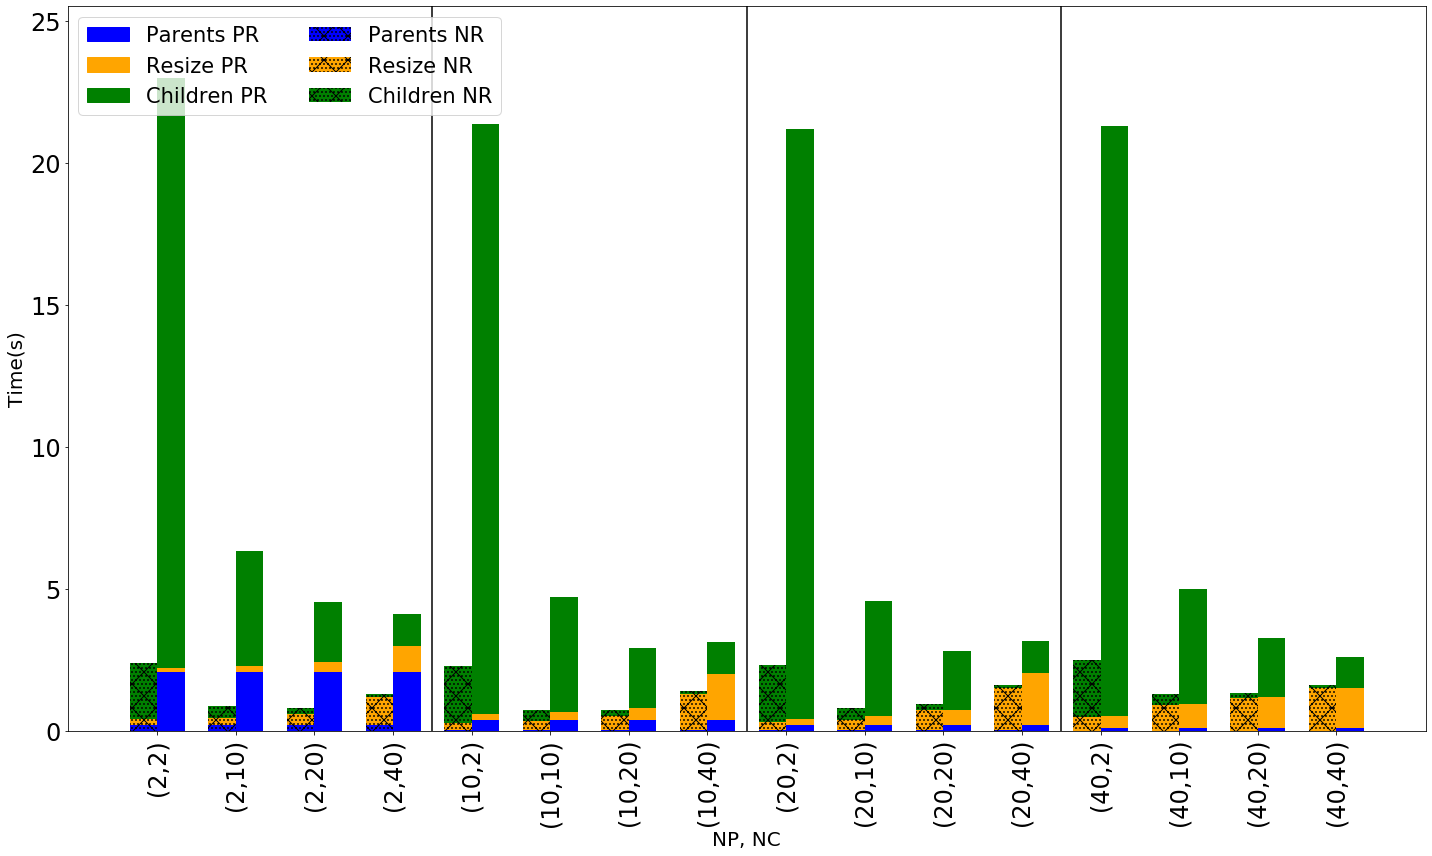

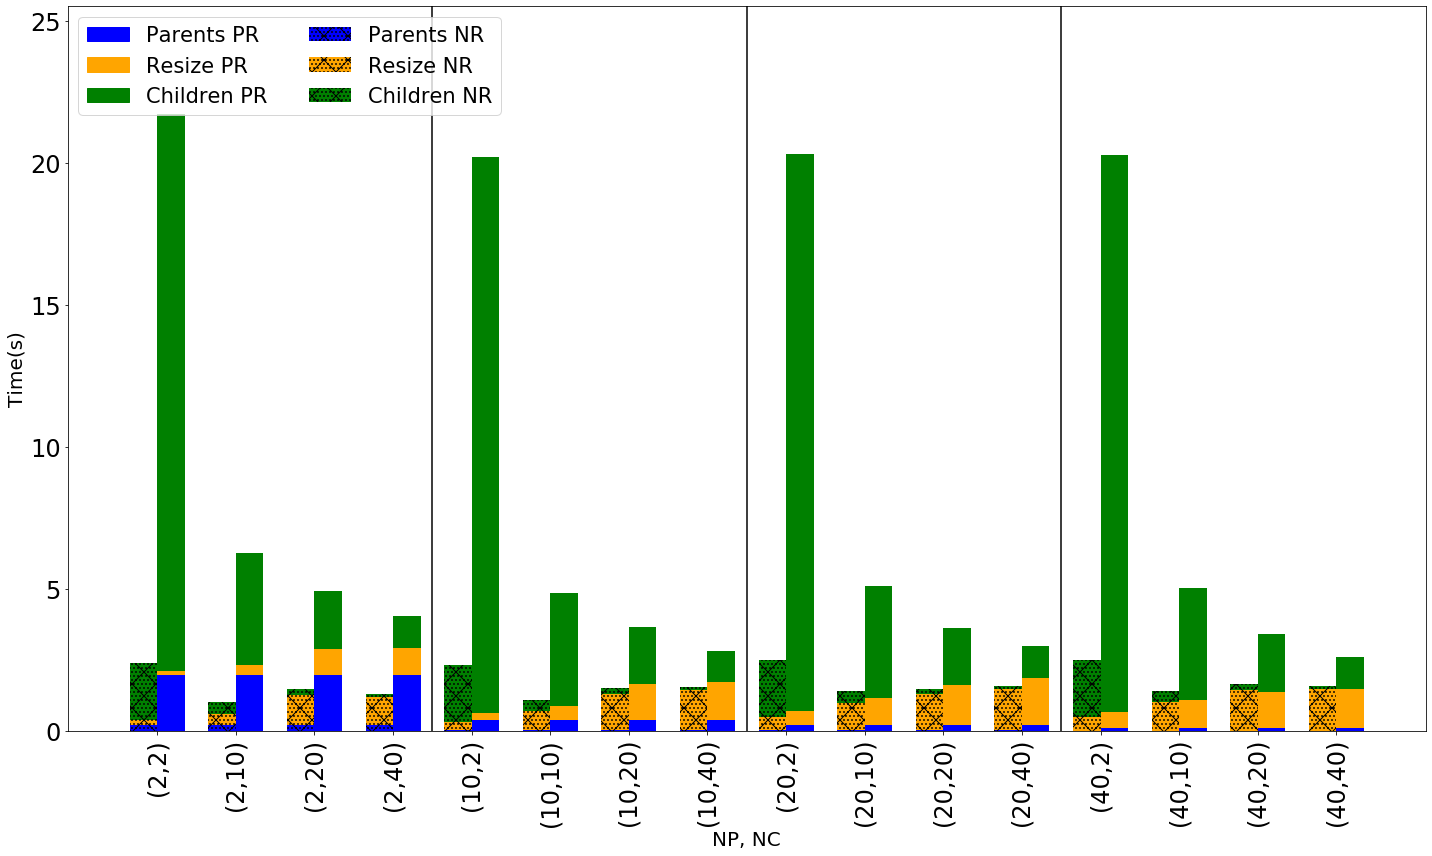

In [37]:
#TP_A_data=[[0.1997793257575758, 0.1997793257575758, 0.1997793257575758, 0.1997793257575758, 0.040469166666666695, 0.040469166666666695, 0.040469166666666695, 0.040469166666666695, 0.019951386363636366, 0.019951386363636366, 0.019951386363636366, 0.019951386363636366, 0.010227022727272729, 0.010227022727272729, 0.010227022727272729, 0.010227022727272729], [0.20020575000000002, 0.20020575000000002, 0.20020575000000002, 0.20020575000000002, 0.039894712121212116, 0.039894712121212116, 0.039894712121212116, 0.039894712121212116, 0.020662818181818185, 0.020662818181818185, 0.020662818181818185, 0.020662818181818185, 0.010635333333333332, 0.010635333333333332, 0.010635333333333332, 0.010635333333333332]]
#TH_A_data=[[1.9977932575757578, 0.40469166666666695, 0.19951386363636364, 0.10227022727272729, 1.9977932575757578, 0.40469166666666695, 0.19951386363636364, 0.10227022727272729, 1.9977932575757578, 0.40469166666666695, 0.19951386363636364, 0.10227022727272729, 1.9977932575757578, 0.40469166666666695, 0.19951386363636364, 0.10227022727272729], [2.0020575000000003, 0.39894712121212117, 0.20662818181818185, 0.10635333333333331, 2.0020575000000003, 0.39894712121212117, 0.20662818181818185, 0.10635333333333331, 2.0020575000000003, 0.39894712121212117, 0.20662818181818185, 0.10635333333333331, 2.0020575000000003, 0.39894712121212117, 0.20662818181818185, 0.10635333333333331]]
#TM_A_data=[[0.2083043333333333, 0.2661843333333333, 0.41778833333333326, 0.9868953333333335, 0.242685, 0.3060793333333333, 0.4986676666666667, 1.2530743333333334, 0.305179, 0.373607, 0.7375183333333334, 1.5113886666666667, 0.501651, 0.8987069999999999, 1.138518666666667, 1.5091376666666665], [0.205789, 0.4116923333333334, 1.0607546666666667, 0.9947066666666666, 0.27494700000000005, 0.669121, 1.2705783333333334, 1.3951336666666665, 0.4765406666666667, 0.9758123333333333, 1.267633, 1.4479673333333334, 0.4905743333333333, 1.0088953333333333, 1.4447113333333332, 1.4516683333333333]]


for dist in [1,2]:
    dist_index=dist-1
    f=plt.figure(figsize=(20, 12))
#for numP in values:

    x = np.arange(len(labelsP_J))

    width = 0.35
    sumaTP_TM = np.add(TP_data[dist_index], TM_data[dist_index]).tolist()
    sumaTP_TM_A = np.add(TP_A_data[dist_index], TM_A_data[dist_index]).tolist()

    ax=f.add_subplot(111)

    ax.bar(x+width/2, TP_data[dist_index], width, color='blue')
    ax.bar(x+width/2, TM_data[dist_index], width, bottom=TP_data[dist_index],color='orange')
    ax.bar(x+width/2, TH_data[dist_index], width, bottom=sumaTP_TM, color='green')

    ax.bar(x-width/2, TP_A_data[dist_index], width, hatch="\\/...", color='blue')
    ax.bar(x-width/2, TM_A_data[dist_index], width, bottom=TP_A_data[dist_index], hatch="\\/...", color='orange')
    ax.bar(x-width/2, TH_A_data[dist_index], width, bottom=sumaTP_TM_A, hatch="\\/...", color='green')

    ax.set_ylabel("Time(s)", fontsize=20)
    ax.set_xlabel("NP, NC", fontsize=20)
    plt.xticks(x, labelsP_J, rotation=90)

    blue_Spatch = mpatches.Patch(color='blue', label='Parents PR')
    orange_Spatch = mpatches.Patch(color='orange', label='Resize PR')
    green_Spatch = mpatches.Patch(color='green', label='Children PR')
    blue_Apatch = mpatches.Patch(hatch='\\/...', facecolor='blue', label='Parents NR')
    orange_Apatch = mpatches.Patch(hatch='\\/...', facecolor='orange', label='Resize NR')
    green_Apatch = mpatches.Patch(hatch='\\/...', facecolor='green', label='Children NR')


    handles=[blue_Spatch,orange_Spatch,green_Spatch,blue_Apatch,orange_Apatch,green_Apatch]

    plt.legend(handles=handles, loc='upper left', fontsize=21,ncol=2)
    
    ax.axvline((3.5), color='black')
    ax.axvline((7.5), color='black')
    ax.axvline((11.5), color='black')
    
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.tick_params(axis='both', which='minor', labelsize=22)
    plt.ylim((0, 25.5))
    #ax.axvline(4)
    
    f.tight_layout()
    f.savefig("Images/EX_Partitions_"+dist_names[dist]+".png", format="png")

In [26]:
def get_types_iker(checked_type='tc', used_direction='e', node_type="All", normality='m'):
    if checked_type=='te':
        var_aux='TE'
        tipo_fig="TE"
        grouped_aux=grouped_aggG2
    elif checked_type=='tc':
        var_aux='TC'
        tipo_fig="Mall"
        grouped_aux=grouped_aggM
    
    if node_type=='Intra':
        grouped_aux=grouped_aux.query('NP < 21 and NS < 21')
    elif node_type=='Inter':
        grouped_aux=grouped_aux.query('NP > 21 or NS > 21')

    if used_direction=='s':
        grouped_aux=grouped_aux.query('NP > NS')
        if node_type=='Intra':
            used_labels=labelsShrinkIntra
        elif node_type=='Inter':
            used_labels=labelsShrinkInter
        elif node_type=='All':
            used_labels=labelsShrink
        name_fig="Shrink"
        
        if normality=='r':
            handles=[OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergePthMult_patch]
        else:
            handles=[OrMult_patch,OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergePthMult_patch]
    elif used_direction=='e':
        grouped_aux=grouped_aux.query('NP < NS')
        if node_type=='Intra':
            used_labels=labelsExpandIntra
        elif node_type=='Inter':
            used_labels=labelsExpandInter
        elif node_type=='All':
            used_labels=labelsExpand
        name_fig="Expand"
        if normality=='r':
            handles=[OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergeSing_patch,MergePthMult_patch,MergePthSing_patch]
        else:
            handles=[OrMult_patch,OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergeSing_patch,MergePthMult_patch,MergePthSing_patch]
    title=tipo_fig+"_Spawn_"+node_type+"_"+name_fig+"_"+normality
    return var_aux, grouped_aux, handles, used_labels, title

In [27]:
def obtain_arrays_iker(grouped_aux, var_aux, used_direction='e', normality='m'):
    vOrMult = list(grouped_aux.query('Cst == 0 and Css == 0')[var_aux])
    vOrSingle = list(grouped_aux.query('Cst == 0 and Css == 1')[var_aux])
    vMergeMult = list(grouped_aux.query('Cst == 2 and Css == 0')[var_aux])
    vOrPthMult = list(grouped_aux.query('Cst == 1 and Css == 0')[var_aux])
    vOrPthSingle = list(grouped_aux.query('Cst == 1 and Css == 1')[var_aux])
    vMergePthMult = list(grouped_aux.query('Cst == 3 and Css == 0')[var_aux])
    h_line = None
    
    if used_direction=='e':
        vMergeSingle = list(grouped_aux.query('Cst == 2 and Css == 1')[var_aux])
        vMergePthSingle = list(grouped_aux.query('Cst == 3 and Css == 1')[var_aux])
    else:
        #FIXME Que tenga en cuenta TH al realizar shrink merge
        vMergePthMult = list(grouped_aux.query('Cst == 3 and Css == 0')[var_aux])
        vMergeSingle = None
        vMergePthSingle = None
    title_y = "Total time(s)"
        
    if normality == 'r':
        vOrSingle = np.subtract(vOrMult, vOrSingle)
        vOrPthMult = np.subtract(vOrMult, vOrPthMult)
        vOrPthSingle = np.subtract(vOrMult, vOrPthSingle)
        vMergeMult = np.subtract(vOrMult, vMergeMult)
        vMergePthMult = np.subtract(vOrMult, vMergePthMult)
        if used_direction=='e':
            vMergeSingle = np.subtract(vOrMult, vMergeSingle)
            vMergePthSingle = np.subtract(vOrMult, vMergePthSingle)
        vOrMult = None
        h_line = 0
        title_y = "Saved time(s)"
    elif normality == 'n':
        vOrSingle = np.divide(vOrSingle, vOrMult)
        vOrPthMult = np.divide(vOrPthMult, vOrMult)
        vOrPthSingle = np.divide(vOrPthSingle, vOrMult)
        vMergeMult = np.divide(vMergeMult, vOrMult)
        vMergePthMult = np.divide(vMergePthMult, vOrMult)
        if used_direction=='e':
            vMergeSingle = np.divide(vMergeSingle, vOrMult)
            vMergePthSingle = np.divide(vMergePthSingle, vOrMult)
        vOrMult = np.divide(vOrMult, vOrMult)
        h_line = 1
        title_y = "Relation Config time / Baseline Time"
    
    data_array=[vOrMult,vOrSingle,vOrPthMult,vOrPthSingle,vMergeMult,vMergeSingle,vMergePthMult,vMergePthSingle]
    v_lines=[]
    value_aux = 0.4
    if used_direction == 'e':
        value_aux = 0.5
    for i in range(0, len(vOrSingle)-1):
        v_lines.append(value_aux + i)
    return data_array, title_y, v_lines, h_line



In [28]:
def legend_loc_iker(data_array, len_x, ylim_zero):
    
    max_value = np.nanmax([x for x in data_array if x is not None]) # Los valores None es necesario evitarlos
    min_value = np.nanmin([x for x in data_array if x is not None]) # Los valores None es necesario evitarlos
    if(ylim_zero):
        min_value = 0
    middle_value = (max_value + min_value) / 2
    offset = (max_value - min_value) * 0.1
    
    def array_check_loc(ini, end):
        up = True
        lower = True
        for i in range(ini, end):
            for j in range(len(data_array)):
                if not (data_array[j] is None):
                    if data_array[j][i] > (middle_value + offset):
                        up = False
                    elif data_array[j][i] < (middle_value - offset):
                        lower = False
                    if not up and not lower:
                        break
            else:
                continue # Only executed if inner loop did NOT break
            break # Only executed if inner loop did break
        return up,lower
    
    up_left, lower_left = array_check_loc(0, math.floor(len_x/2))
    up_right, lower_right = array_check_loc(0, math.floor(len_x/2))

    legend_loc = 'best'
    if up_left:
        legend_loc = 'upper left'
    elif up_right:
        legend_loc = 'upper right'
    elif lower_left:
        legend_loc = 'lower left'
    elif lower_right:
        lower_right = 'lower right'

    return legend_loc
        

In [29]:
def graphic_iker(data_array, title="None", title_y="None", title_x="None", handles=None, used_labels=None, v_lines=None, h_line=None, ylim_zero=True):
    f=plt.figure(figsize=(30, 12))
    ax=f.add_subplot(111)
    x = np.arange(len(used_labels))
    width = 0.45/4
    
    legend_loc = legend_loc_iker(data_array, len(used_labels), ylim_zero)

    if not (data_array[0] is None):
        ax.bar(x-width*3.5, data_array[0], width, color='green')
    ax.bar(x-width*2.5, data_array[1], width, hatch="", color='springgreen')
    ax.bar(x-width*1.5, data_array[2], width, hatch="//", color='blue')
    ax.bar(x-width*0.5, data_array[3], width, hatch="\\",color='darkblue')

    ax.bar(x+width*0.5, data_array[4], width, hatch="||", color='red')
    if not (data_array[5] is None):
        ax.bar(x+width*1.5, data_array[5], width, hatch="...", color='darkred')
        ax.bar(x+width*2.5, data_array[6], width, hatch="xx", color='yellow')
    else:
        ax.bar(x+width*1.5, data_array[6], width, hatch="xx", color='yellow')
    if not (data_array[7] is None):
        ax.bar(x+width*3.5, data_array[7], width, hatch="++",color='olive')

    ax.axhline((0), color='black', linestyle='dashed')
    ax.set_ylabel(title_y, fontsize=30)
    ax.set_xlabel(title_x, fontsize=28)
    plt.xticks(x, used_labels, rotation=90)
    plt.legend(handles=handles, loc=legend_loc, fontsize=26,ncol=2,framealpha=1)
    
    if not ylim_zero: # Modifica los limites del eje y. No es buena practica que no aparezca el 0
        max_value = np.nanmax([x for x in data_array if x is not None]) # Los valores None es necesario evitarlos
        max_value += max_value * 0.1
        min_value = np.nanmin([x for x in data_array if x is not None]) # Los valores None es necesario evitarlos
        min_value -= min_value * 0.1
        if min_value < 0.1:
            min_value = 0
        plt.ylim((min_value, max_value))
    
    for line in v_lines:
        ax.axvline((line), color='black')
    if h_line != None:
        ax.axhline((h_line), color='black')
    
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.tick_params(axis='both', which='minor', labelsize=28)
    
    f.tight_layout()
    f.savefig("Images/Spawn/"+title+".png", format="png")

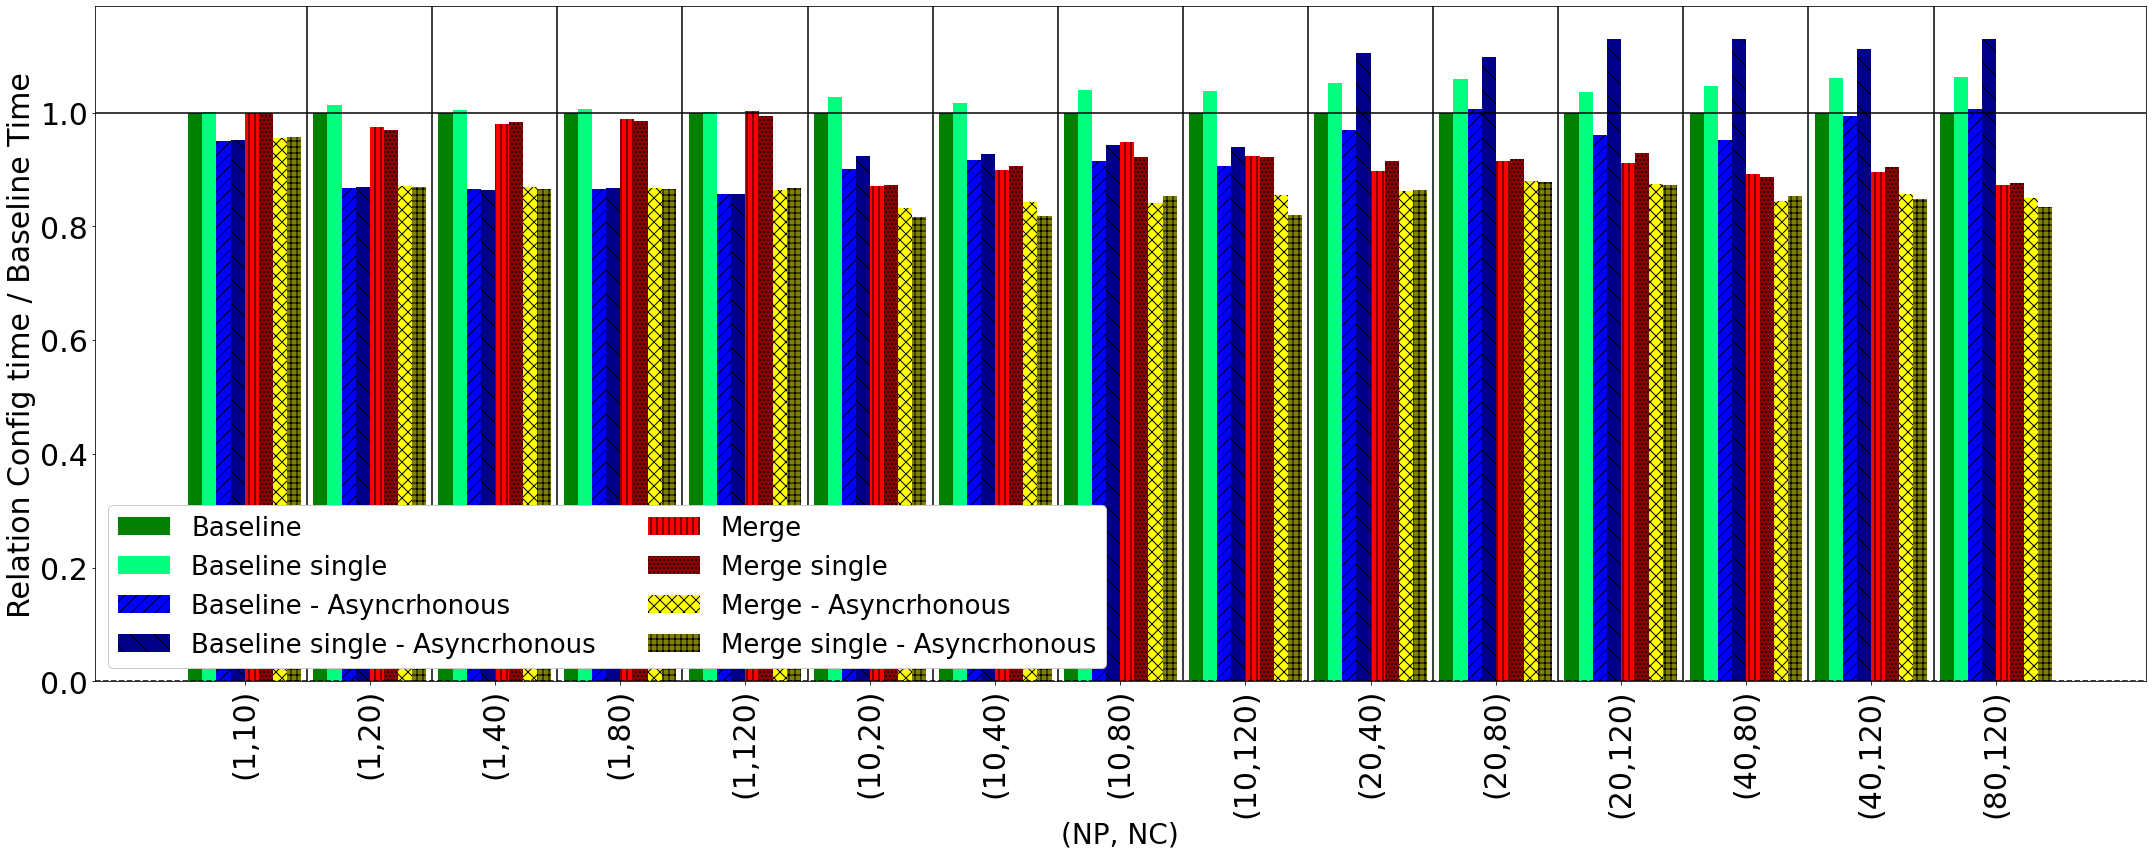

In [16]:
checked_type='te' # Valores 'te' y 'tc'
used_direction='e' # Valores 's' y 'e'
node_type='All' # Valores 'Intra', 'Inter', 'All'
normality='n'
#Values 'n' (normalizar), 'l' (logaritmico), 'm' (sin modificaciones), 'r' (Comparar respecto al primero)

ylim_zero = True

var_aux, grouped_aux, handles, used_labels, title = get_types_iker(checked_type, used_direction, node_type, normality)
array_aux, title_y, v_lines, h_line = obtain_arrays_iker(grouped_aux, var_aux, used_direction, normality)
graphic_iker(array_aux, title, title_y, "(NP, NC)", handles, used_labels, v_lines, ylim_zero)

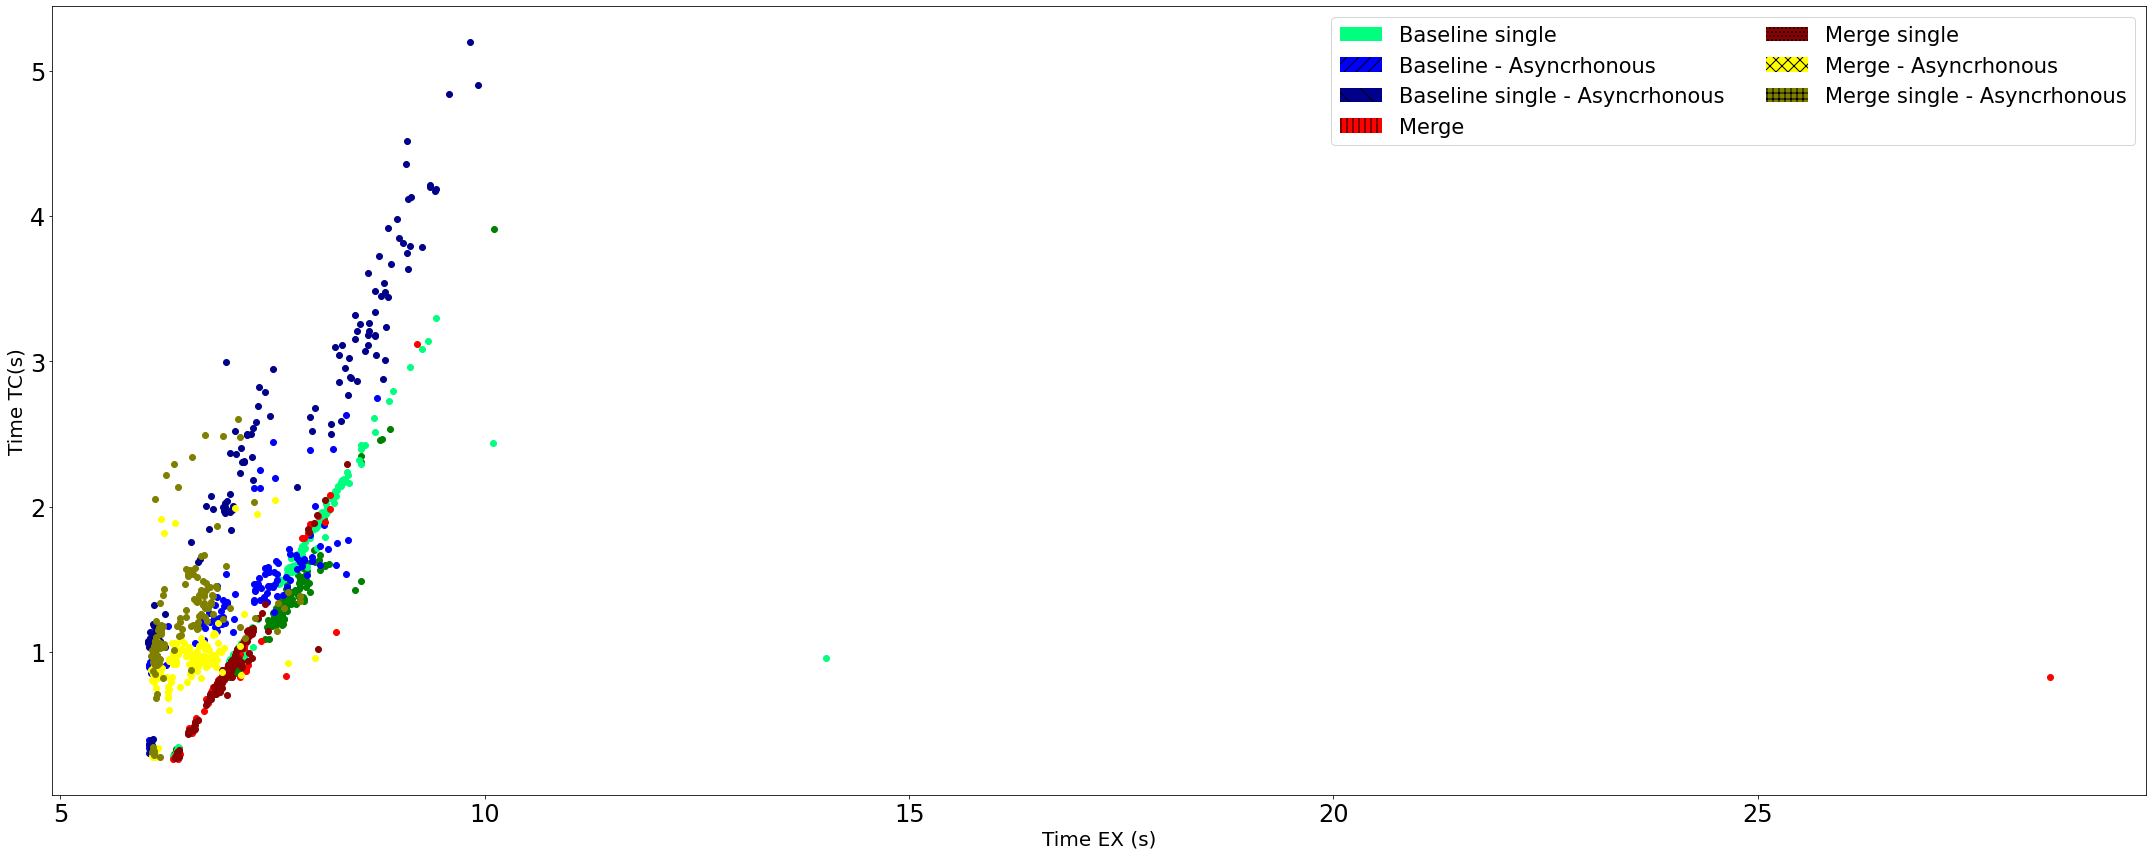

In [31]:
used_direction='e'
    
if used_direction=='s':
    dfM_aux=dfM.query('NP > NS')
    dfG_aux=dfG.query('NP > NS')
    used_labels=labelsShrink
    name_fig="Shrink"
    handles=[OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergePthMult_patch]
elif used_direction=='e':
    dfM_aux=dfM.query('NP < NS')
    dfG_aux=dfG.query('NP < NS')
    used_labels=labelsExpand
    name_fig="Expand"
    handles=[OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergeSing_patch,MergePthMult_patch,MergePthSing_patch]
# < Expand
# > Shrink

vOrMult = list(dfG_aux.query('Cst == 0 and Css == 0')['TE'])
vOrSingle = list(dfG_aux.query('Cst == 0 and Css == 1')['TE'])
vOrPthMult = list(dfG_aux.query('Cst == 1 and Css == 0')['TE'])
vOrPthSingle = list(dfG_aux.query('Cst == 1 and Css == 1')['TE'])

vMergeMult = list(dfG_aux.query('Cst == 2 and Css == 0')['TE'])
vMergeSingle = list(dfG_aux.query('Cst == 2 and Css == 1')['TE'])
vMergePthMult = list(dfG_aux.query('Cst == 3 and Css == 0')['TE'])
vMergePthSingle = list(dfG_aux.query('Cst == 3 and Css == 1')['TE'])

vOrMult2 = list(dfM_aux.query('Cst == 0 and Css == 0')['TC'])
vOrSingle2 = list(dfM_aux.query('Cst == 0 and Css == 1')['TC'])
vOrPthMult2 = list(dfM_aux.query('Cst == 1 and Css == 0')['TC'])
vOrPthSingle2 = list(dfM_aux.query('Cst == 1 and Css == 1')['TC'])

vMergeMult2 = list(dfM_aux.query('Cst == 2 and Css == 0')['TC'])
vMergeSingle2 = list(dfM_aux.query('Cst == 2 and Css == 1')['TC'])
vMergePthMult2 = list(dfM_aux.query('Cst == 3 and Css == 0')['TC'])
vMergePthSingle2 = list(dfM_aux.query('Cst == 3 and Css == 1')['TC'])

f=plt.figure(figsize=(30, 12))
ax=f.add_subplot(111)

ax.scatter(vOrMult,vOrMult2, color='green')
ax.scatter(vOrSingle,vOrSingle2,  color='springgreen')
ax.scatter(vOrPthMult,vOrPthMult2, color='blue')
ax.scatter(vOrPthSingle,vOrPthSingle2,color='darkblue')

ax.scatter(vMergeMult,vMergeMult2, color='red')
if used_direction=='e':
    ax.scatter(vMergeSingle,vMergeSingle2,color='darkred')
ax.scatter(vMergePthMult,vMergePthMult2, color='yellow')
if used_direction=='e':
    ax.scatter(vMergePthSingle,vMergePthSingle2,color='olive')

ax.set_ylabel("Time TC(s)", fontsize=20)
ax.set_xlabel("Time EX (s)", fontsize=20)
#plt.xticks(x, used_labels, rotation=90)
plt.legend(handles=handles, loc='upper right', fontsize=21,ncol=2)
    
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=22)
    
f.tight_layout()
f.savefig("Images/Spawn/Dispersion_Spawn_"+name_fig+".png", format="png")

In [ ]:
valores1 = [0]*10
valores2 = [0.2]*10
valores3 = [0.4]*10
valores4 = [0.6]*10
valores5 = [0.8]*10
valores6 = [1]*10
valores7 = [1.2]*10
valores8 = [1.4]*10

for np_aux in processes:
    for ns_aux in processes:
        if np_aux != ns_aux:
            if np_aux > ns_aux:
                used_labels=labelsShrink
                name_fig="Shrink"
                handles=[OrMult_patch,OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergePthMult_patch]
            else:
                used_labels=labelsExpand
                name_fig="Expand"
                handles=[OrMult_patch,OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergeSing_patch,MergePthMult_patch,MergePthSing_patch]
                
            dfM_aux = dfM.query('NP == @np_aux and NS == @ns_aux')
            vOrMult2 = list(dfM_aux.query('Cst == 0 and Css == 0')['TC'])
            vOrSingle2 = list(dfM_aux.query('Cst == 0 and Css == 1')['TC'])
            vOrPthMult2 = list(dfM_aux.query('Cst == 1 and Css == 0')['TC'])
            vOrPthSingle2 = list(dfM_aux.query('Cst == 1 and Css == 1')['TC'])

            vMergeMult2 = list(dfM_aux.query('Cst == 2 and Css == 0')['TC'])
            vMergeSingle2 = list(dfM_aux.query('Cst == 2 and Css == 1')['TC'])
            vMergePthMult2 = list(dfM_aux.query('Cst == 3 and Css == 0')['TC'])
            vMergePthSingle2 = list(dfM_aux.query('Cst == 3 and Css == 1')['TC'])

            f=plt.figure(figsize=(16, 8))
            ax=f.add_subplot(111)

            ax.scatter(vOrMult2,valores1, color='green')
            ax.scatter(vOrSingle2,valores2,  color='springgreen')
            ax.scatter(vOrPthMult2,valores3, color='blue')
            ax.scatter(vOrPthSingle2,valores4,color='darkblue')

            ax.scatter(vMergeMult2,valores5, color='red')
            if np_aux < ns_aux:
                ax.scatter(vMergeSingle2,valores6,color='darkred')
            ax.scatter(vMergePthMult2,valores7, color='yellow')
            if np_aux < ns_aux:
                ax.scatter(vMergePthSingle2,valores8,color='olive')

            ax.set_xlabel("Time TC(s)", fontsize=16)
            ax.set_ylabel("-", fontsize=16)
#plt.xticks(x, used_labels, rotation=90)
            plt.legend(handles=handles, loc='upper right', fontsize=14,ncol=2)
    
            ax.tick_params(axis='both', which='major', labelsize=20)
            ax.tick_params(axis='both', which='minor', labelsize=18)
    
            f.tight_layout()
            f.savefig("Images/Spawn/Dispersion/Dispersion_Spawn_"+name_fig+"_"+str(np_aux)+"_"+str(ns_aux)+".png", format="png")

In [ ]:
used_direction='e'
test_parameter='TA'
#TS es merge y TA connect para tests solo spawn
    
if used_direction=='s':
    dfM_aux=dfM.query('NP > NS')
    used_labels=labelsShrink
    name_fig="Shrink"
    handles=[OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergePthMult_patch]
elif used_direction=='e':
    dfM_aux=dfM.query('NP < NS')
    used_labels=labelsExpand
    name_fig="Expand"
    handles=[OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergeSing_patch,MergePthMult_patch,MergePthSing_patch]
# < Expand
# > Shrink

dfM_aux = dfM_aux.copy()
#dfM_aux['NTotal'] = dfM_aux['NP'] + dfM_aux['NS']
dfM_aux['NTotal'] = dfM_aux['NS']

#x = np.arange(len(used_labels))
for cst_aux in [0,1,2,3]:
    for css_aux in [0,1]:
        f=plt.figure(figsize=(20, 12))
        ax=f.add_subplot(111)
        
        #sns.boxplot(y=test_parameter, x="NS", hue="NP", data = dfM_aux[(dfM_aux.Cst == cst_aux)][(dfM_aux.Css == css_aux)], orient="v", ax=ax)
        sns.boxplot(y=test_parameter, x="NTotal", data = dfM_aux[(dfM_aux.Cst == cst_aux)][(dfM_aux.Css == css_aux)], orient="v", ax=ax)
        
        # Anyade en el plot el numero de iteraciones - Por hacer TODO
        # https://stackoverflow.com/questions/45475962/labeling-boxplot-with-median-values
        #medians_aux = dfM[(dfM.Cst == cst_aux)][(dfM.Css == css_aux)].groupby(['NS','NP'])['TC'].median()
        #m1 = dfM[(dfM.Cst == cst_aux)][(dfM.Css == css_aux)].groupby(['NS','NP'])['TC'].median().values
        #mL1 = [str(np.ceil(s)) for s in m1]

        #ind = 0
        #for tick in range(len(ax.get_xticklabels())):
        #    ax.text(tick-.2, m1[ind+1]+1, mL1[ind+1],  horizontalalignment='center',  color='w', weight='semibold')
        #    ax.text(tick+.2, m1[ind]+1, mL1[ind], horizontalalignment='center', color='w', weight='semibold')
        #    ind += 2 
        
        ax.set_ylabel("Time TC(s)", fontsize=20)
        ax.set_xlabel("NC", fontsize=20)
        plt.legend(loc='upper left', fontsize=21, title = "NP")
        ax.tick_params(axis='both', which='major', labelsize=24)
        ax.tick_params(axis='both', which='minor', labelsize=22)
        
        ax.axvline((.5), color='black')
        ax.axvline((1.5), color='black')
        ax.axvline((2.5), color='black')
        ax.axvline((3.5), color='black')
        ax.axvline((4.5), color='black')
        
        f.tight_layout()
        f.savefig("Images/Spawn/Boxplot_"+name_fig+"_"+test_parameter+"_"+labelsMethods[cst_aux*2 + css_aux]+".png", format="png")

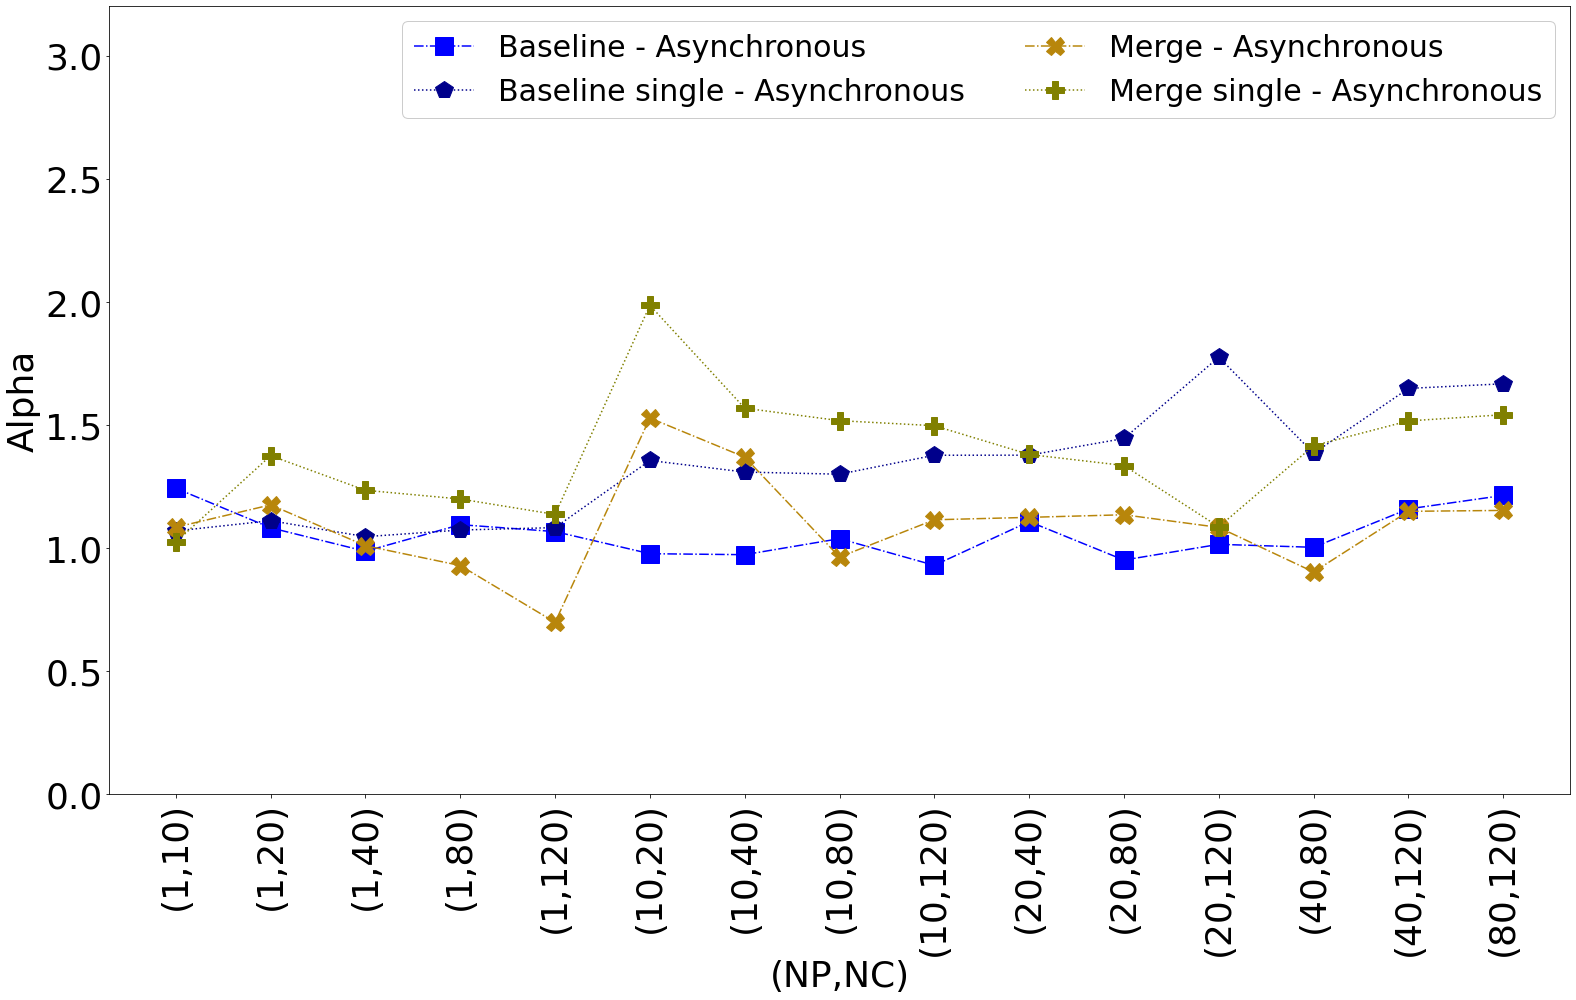

In [71]:
used_direction='e'
test_parameter='alpha' #Valores son "alpha" o "omega"

if test_parameter == 'alpha':
    name_fig="Alpha_"
    real_parameter='Alpha_A'
elif test_parameter == 'omega':
    name_fig="Omega_"
    real_parameter='Omega_A'
    
df_aux=grouped_aggM
if used_direction=='s':
    df_aux=df_aux.query('NP > NS')
    used_labels=labelsShrinkOrdered
    name_fig= name_fig+"Shrink"
elif used_direction=='e':
    df_aux=df_aux.query('NP < NS')
    used_labels=labelsExpand
    name_fig= name_fig+"Expand"
elif used_direction=='a':
    df_aux=df_aux
    used_labels=labels
    name_fig= name_fig+"All"    

x = np.arange(len(used_labels))

f=plt.figure(figsize=(22, 14))
ax=f.add_subplot(111)
ax.set_xlabel("(NP,NC)", fontsize=36)
ax.set_ylabel(test_parameter.capitalize(), fontsize=36)
plt.xticks(x, used_labels,rotation=90)
ax.tick_params(axis='both', which='major', labelsize=36)
ax.tick_params(axis='both', which='minor', labelsize=36)

for cst_aux in [1,3]:
    df_aux2 = df_aux.query('Cst == @cst_aux')
    for css_aux in [0,1]:
        if cst_aux == 3 and css_aux == 1 and used_direction == 's':
            continue
        array_aux = df_aux2.query('Css == @css_aux')
        if used_direction=='s':
            array_aux = array_aux.sort_values(by=['NS'])
        array_aux = array_aux[real_parameter].values
        style_aux = cst_aux*2 + css_aux
        ax.plot(x, array_aux, color=colors_spawn[style_aux], linestyle=linestyle_spawn[style_aux%4], \
                marker=markers_spawn[style_aux], markersize=18, label=labelsMethods[style_aux])
        
ax.set_ylim(0,3.2)
plt.legend(loc='best', fontsize=30,ncol=2,framealpha=1)
        
f.tight_layout()
f.savefig("Images/Spawn/LinePlot_"+name_fig+".png", format="png")

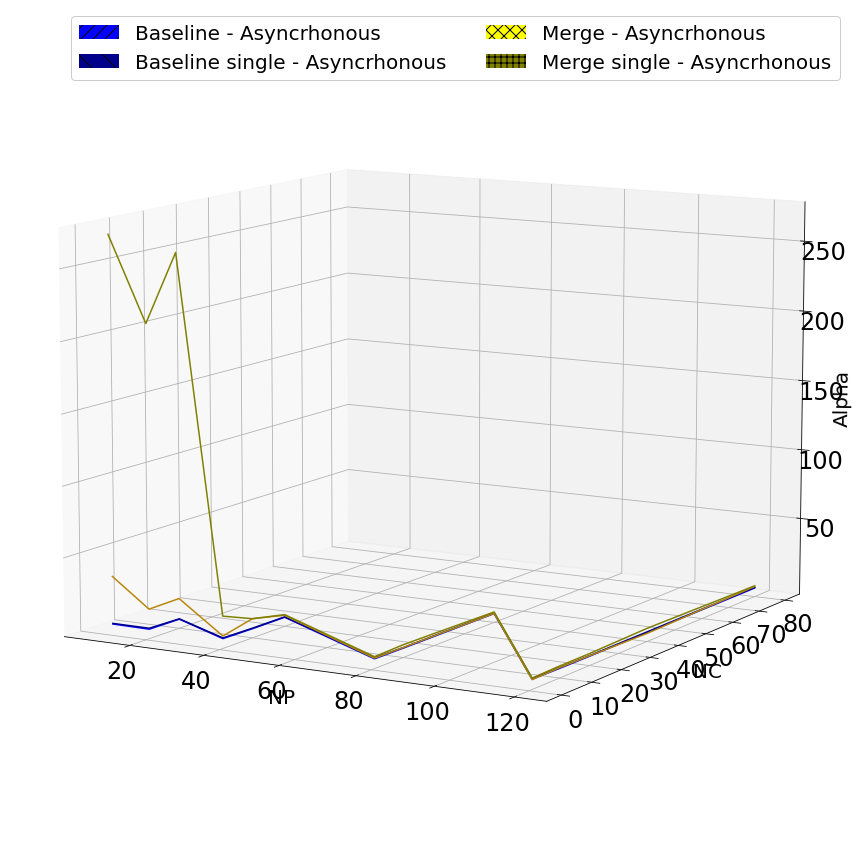

In [104]:
used_direction='s'
test_parameter='alpha' #Valores son "alpha" o "omega"
    
if used_direction=='s':
    df_aux=grouped_aggM.query('NP > NS')
    used_labels=labelsShrink
    name_fig="Shrink"
    np_aux = [10, 20,20, 40,40,40, 80,80,80,80, 120,120,120,120,120]
    nc_aux = [1,  1,10,  1,10,20,  1,10,20,40,  1,10,20,40,80]
elif used_direction=='e':
    df_aux=grouped_aggM.query('NP < NS')
    used_labels=labelsExpand
    name_fig="Expand"
    np_aux = [1,1,1,1,1,        10,10,10,10,  20,20,20,  40,40,  80 ]
    nc_aux = [10,20,40,80,120,  20,40,80,120, 40,80,120, 80,120, 120]
elif used_direction=='a':
    df_aux=grouped_aggM
    used_labels=labels
    name_fig="All"
    np_aux = [1,1,1,1,1,        10,10,10,10,10, 20,20,20,20,20, 40,40,40,40,40, 80,80,80,80,80, 120,120,120,120,120]
    nc_aux = [10,20,40,80,120,  1,20,40,80,120, 1,10,40,80,120, 1,10,20,80,120, 1,10,20,40,120, 1,10,20,40,80]
    
x = np.arange(len(used_labels))
handles = []

f=plt.figure(figsize=(20, 12))
#ax=f.add_subplot(111)
ax = plt.axes(projection='3d')
ax.azim = -60
ax.dist = 10
ax.elev = 10
ax.set_xlabel("NP", fontsize=20)
ax.set_ylabel("NC", fontsize=20)
ax.set_zlabel("Alpha", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=22)

for cst_aux in [1,3]:
    df_aux2 = df_aux.query('Cst == @cst_aux')
    for css_aux in [0,1]:
        array_aux = df_aux2.query('Css == @css_aux')['alpha'].values
        ax.plot3D(np_aux, nc_aux, array_aux, colors_spawn[cst_aux*2 + css_aux])
      
        handles.append(handles_spawn[cst_aux*2 + css_aux])
        
#ax.set_zlim(0,4)
plt.legend(handles=handles, loc='best', fontsize=20,ncol=2,framealpha=1)
        
f.tight_layout()
f.savefig("Images/Spawn/3dPlot_"+name_fig+'_'+test_parameter+".png", format="png")

In [10]:
def check_normality(df, tipo):
    normality=[True] * (len(processes) * (len(processes)-1))
    total=0
    i=-1
    #Comprobar para cada configuración si se sigue una distribución normal/gaussiana
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                i+=1
                for cst_aux in [0,1,2,3]:
                    for css_aux in [0,1]:
                        df_aux = df.query('NP == @np_aux and NS == @ns_aux and Cst == @cst_aux and Css == @css_aux')
                        dataList = list(df_aux[tipo])
                        st,p = stats.shapiro(dataList) # Tendrían que ser al menos 20 datos y menos de 50
                        if p < p_value:
                            normality[i]=False
                            total+=1
            
    
    print("Se sigue una distribución guassiana: " + str(normality) + "\nUn total de: " + str(total) + " no siguen una gaussiana")
    return normality

In [11]:
def compute_global_stat_difference(dataLists, parametric):
    if parametric:
        st,p=stats.f_oneway(dataLists[0],dataLists[1],dataLists[2],dataLists[3],dataLists[4],dataLists[5],dataLists[6],dataLists[7])
    else:
        st,p=stats.kruskal(dataLists[0],dataLists[1],dataLists[2],dataLists[3],dataLists[4],dataLists[5],dataLists[6],dataLists[7])
    if p > p_value: # Si son iguales, no hay que hacer nada más
        return False
    return True

In [19]:
def compute_global_posthoc(dataLists, parametric):
    data_stats=[]
    ini=0
    end=len(labelsMethods)
    if parametric:
        df_aux = sp.posthoc_ttest(dataLists)
        df_Res = df_aux.copy()
        for i in range(ini,end):
            data_stats.append(np.mean(dataLists[i]))
            for j in range(ini,end):
                if df_Res.iat[i,j] < p_value: # Medias diferentes
                    df_Res.iat[i, j] = True
                else:
                    df_Res.iat[i, j] = False
    else:
        df_aux = sp.posthoc_conover(dataLists)
        df_Res = df_aux.copy()
        for i in range(ini,end):
            data_stats.append(np.median(dataLists[i]))
            for j in range(ini,end):
                if df_Res.iat[i,j] < p_value: # Medianas diferentes
                    df_Res.iat[i, j] = True
                else:
                    df_Res.iat[i, j] = False
    #print(df_Res)
    #print(df_aux)
    #print(data_stats)
    return df_Res, data_stats

In [13]:
# Aquellos grupos que tengán valores por encima del límite no se considerarán
# Con sumar a si mismos su valor actual estarán fuera
def check_groups_boundaries(data_stats, np_aux, ns_aux, tc_boundary):
    index_aux = 0
    for cst_aux in [0,2]: # Primero los grupos síncronos
        for css_aux in [0,1]:
            if cst_aux == 2 and css_aux == 1 and np_aux > ns_aux: # Arreglo para coger bien el tiempo en Merge Single Shrink
                index_aux = 1
            tc_val = grouped_aggM.loc[('2,2',0, cst_aux, css_aux - index_aux, np_aux,ns_aux), 'TC_A']
            if tc_val > tc_boundary:
                data_stats[cst_aux*2 + css_aux]+=data_stats[cst_aux*2 + css_aux]
    index_aux = 0
    for cst_aux in [1,3]: # Segundo se comprueban los asíncronos
        for css_aux in [0,1]:
            if cst_aux == 3 and css_aux == 1 and np_aux > ns_aux: # Arreglo para coger bien el tiempo en Merge Single Shrink
                index_aux = 1
            tc_val = grouped_aggM.loc[('2,2',0, cst_aux, css_aux - index_aux, np_aux,ns_aux), 'TH']
            if tc_val > tc_boundary:
                data_stats[cst_aux*2 + css_aux]+=data_stats[cst_aux*2 + css_aux]

In [14]:
def get_stat_differences(df_Res, data_stats, np_aux, ns_aux, shrink, parametric):
    best = 0
    otherBest=[]
    
    # TODO Descomentar tras anyadir RMS perspective en results_with_st
    #if rms_boundary != 0: # Si se usa perspectiva de RMS, se desconsideran valores muy altos
    #    check_groups_boundaries(data_stats, np_aux, ns_aux, tc_boundary) 
        
    indexes = np.argsort(data_stats)
    best = -1
    i = 0
    while best == -1:
        index = indexes[i]
        if not (shrink and (index == 5 or index == 7)): # Las opciones Merge single(5) y Merge single - Pthreads(7) no se utilizan al reducir
            #if rms_boundary == 0 or data_stats[index] <= tc_boundary:
            best = index
        i+=1
    otherBest=[]
    for index in range(len(labelsMethods)): # Para cada metodo exceptuando best
        if not (shrink and (index == 5 or index == 7)): # Las opciones Merge single(5) y Merge single - Pthreads(7) no se utilizan al reducir
            if index != best and not df_Res.iat[best,index]: #Medias/Medianas iguales
                #if data_stats[index] <= tc_boundary:
                otherBest.append(index)
    stringV=""
    for i in otherBest:
        stringV+=labelsMethods[i]+", "
    print("Redimensión " + str(np_aux) + "/" + str(ns_aux) +" "+ str(parametric)+" Mejores: " + labelsMethods[best]+", " + stringV)
    otherBest.insert(0,best)
    
    return otherBest

In [15]:
def get_perc_differences(dataLists, np_aux, ns_aux, shrink, rms_boundary, tc_boundary):
    data_stats = []
    ini=0
    end=len(labelsMethods)
    for i in range(ini,end):
        data_stats.append(np.median(dataLists[i]))
        
    if rms_boundary != 0: # Si se usa perspectiva de RMS, se desconsideran valores muy altos
        check_groups_boundaries(data_stats, np_aux, ns_aux, tc_boundary) 
    indexes = np.argsort(data_stats)
    
    best = -1
    bestMax = -1
    otherBest=[]
    for index in indexes: # Para cada metodo -- Empezando por el más bajo en media/mediana
        if shrink and (index == 5 or index == 7): # Las opciones Merge single(5) y Merge single - Pthreads(7) no se utilizan al reducir
            continue
        
        if best == -1:
            best = index
            bestMax = data_stats[best] * 0.05 + data_stats[best]
        elif data_stats[index] <= bestMax: # Medias/Medianas diferentes && Media/Medianas i < Media/Mediana best
            otherBest.append(index)
                
        
    stringV=""
    for i in otherBest:
        stringV+=labelsMethods[i]+", "
    print("Redimensión " + str(np_aux) + "/" + str(ns_aux)+" Mejores: " + labelsMethods[best]+", " + stringV)
    otherBest.insert(0,best)
    
    return otherBest

In [16]:
#Obtiene 
def check_groups_stats(dataLists, np_aux, ns_aux, shrink, parametric):
    global_difference=compute_global_stat_difference(dataLists, parametric)
    if not global_difference:
        print("Configuración: " + str(np_aux) + "/" + str(ns_aux) + " tiene valores iguales")
        return
    
    df_Res,data_stats=compute_global_posthoc(dataLists,parametric)
    return get_stat_differences(df_Res, data_stats, np_aux, ns_aux, shrink, parametric)
    

In [17]:
def results_with_st(tipo, data_aux):
    normality=check_normality(data_aux,tipo)
    if False in normality:
        normality = False
    else:
        normality = True
    
    
    results = []
    shrink = False
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                dataSet = data_aux.query('NP == @np_aux and NS == @ns_aux')
                dataLists=[]
                if np_aux > ns_aux:
                    shrink = True
                else:
                    shrink = False
                #normality=True
                for cst_aux in [0,1,2,3]:
                    for css_aux in [0,1]:
                        dataSet_aux = dataSet.query('Cst == @cst_aux and Css == @css_aux')
                        lista_aux = list(dataSet_aux[tipo])
                        dataLists.append(lista_aux)
                        #Si permito el shaphiro, acabare comparando manzanas y naranjas
                        # si hay distribuciones normales y no normales
                        #st,p = stats.shapiro(lista_aux) # Tendrían que ser al menos 20 datos y menos de 50
                        #if p < p_value:
                        #normality=False

                aux_data = check_groups_stats(dataLists, np_aux, ns_aux, shrink, normality)
                results.append(aux_data)
    return results

In [18]:
def results_with_perc(tipo, data_aux, rms_boundary=0):
    results = []
    shrink = False
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                dataSet = data_aux.query('NP == @np_aux and NS == @ns_aux')
                dataLists=[]
                if np_aux > ns_aux:
                    shrink = True
                else:
                    shrink = False
                
                tc_boundary = dfM.query('NP == @np_aux and NS == @ns_aux')['TC'].max()
                if rms_boundary == 0:
                    for cst_aux in [0,1,2,3]:
                        for css_aux in [0,1]:
                            dataSet_aux = dataSet.query('Cst == @cst_aux and Css == @css_aux')
                            lista_aux = list(dataSet_aux[tipo])
                            dataLists.append(lista_aux)
                else:
                    boundaries = []
                    for cst_aux in [0,1,2,3]:
                        for css_aux in [0,1]:
                            dataSet_aux = dataSet.query('Cst == @cst_aux and Css == @css_aux')
                            lista_aux = list(dataSet_aux[tipo])
                            dataLists.append(lista_aux)
                            
                            if cst_aux == 0 or cst_aux == 2:
                                if cst_aux == 2 and css_aux == 1  and (np_aux > ns_aux):
                                    new_boundary = tc_boundary
                                else:
                                    new_boundary = grouped_aggM.loc[('2,2',0, cst_aux, css_aux, np_aux,ns_aux), 'TC_A']
                            else:
                                if cst_aux == 3 and css_aux == 1 and (np_aux > ns_aux):
                                    new_boundary = tc_boundary
                                else:
                                    new_boundary = grouped_aggM.loc[('2,2',0, cst_aux, css_aux, np_aux,ns_aux), 'TH']
                            boundaries.append(new_boundary)
                    tc_boundary = min(boundaries)
                    tc_boundary = tc_boundary + tc_boundary*rms_boundary

                aux_data = get_perc_differences(dataLists, np_aux, ns_aux, shrink, rms_boundary, tc_boundary)
                results.append(aux_data)
    return results

In [ ]:
checked_type='tc'
use_perc = False
rms_boundary=0 # Poner a 0 para perspectiva de app. Valor >0 y <1 para perspectiva de RMS
if checked_type=='te':
    tipo="TE"
    data_aux=dfG
elif checked_type=='tc':
    tipo="TC"
    data_aux=dfM
    
if use_perc:
    results = results_with_perc(tipo, data_aux, rms_boundary)
else:
    results = results_with_st(tipo, data_aux)

print(results)

In [42]:
#Lista de indices de mayor a menor de los valores
aux_array = []
for data in results:
    aux_array+=data
unique, counts = np.unique(aux_array, return_counts=True)
aux_dict = dict(zip(unique, counts))
aux_keys=list(aux_dict.keys())
aux_values=list(aux_dict.values())
aux_ordered_index=list(reversed(list(np.argsort(aux_values))))

i=0
j=0
used_aux=0
heatmap=np.zeros((len(processes),len(processes))).astype(int)

if use_perc:
    for i in range(len(processes)):
        for j in range(len(processes)):
            if i==j:
                heatmap[i][j]=-1
                used_aux+=1
            else:
                results_index = i*len(processes) +j-used_aux
                heatmap[i][j] = results[results_index][0]
else:
    for i in range(len(processes)):
        for j in range(len(processes)):
            if i==j:
                heatmap[i][j]=-1
                used_aux+=1
            else:  
                results_index = i*len(processes) +j-used_aux
                for index in aux_ordered_index:
                    if aux_keys[index] in results[results_index]:
                        heatmap[i][j]=aux_keys[index]
                        break
heatmap[len(processes)-1][len(processes)-1]=8
print(heatmap)

[[-1  2  7  7  6  2]
 [ 2 -1  7  7  6  6]
 [ 4  6 -1  6  6  6]
 [ 4  4  6 -1  6  6]
 [ 6  6  6  6 -1  6]
 [ 6  6  6  6  6  8]]


In [43]:
#Adapta results a una cadena asegurando que cada cadena no se sale de su celda
results_str = []
max_counts = 1
for i in range(len(results)):
    results_str.append(list())
    count = len(results[i])
    new_data = str(results[i]).replace('[','').replace(']','')
    remainder = count%3
    
    if count <= 3:
        results_str[i].append(new_data)
    else:
        if remainder == 0:
            results_str[i].append(new_data[0:8])
            results_str[i].append(new_data[9:])
        else:
            index = 1 + (remainder -1)*3
            results_str[i].append(new_data[0:index+1])
            results_str[i].append(new_data[index+2:])
        
    if count > max_counts:
        if count > 3:
            aux_value = results_str[i].pop()[0:1]
        results_str[i][0] = results_str[i][0][0:max_counts*3-2]
        if remainder == 1 and max_counts > 1:
            results_str[i][0] = results_str[i][0] + ' ' + aux_value
#print(results_str)

/tmp/ipykernel_8791/2593541567.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+processes, fontsize=36)
/tmp/ipykernel_8791/2593541567.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+processes, fontsize=36)


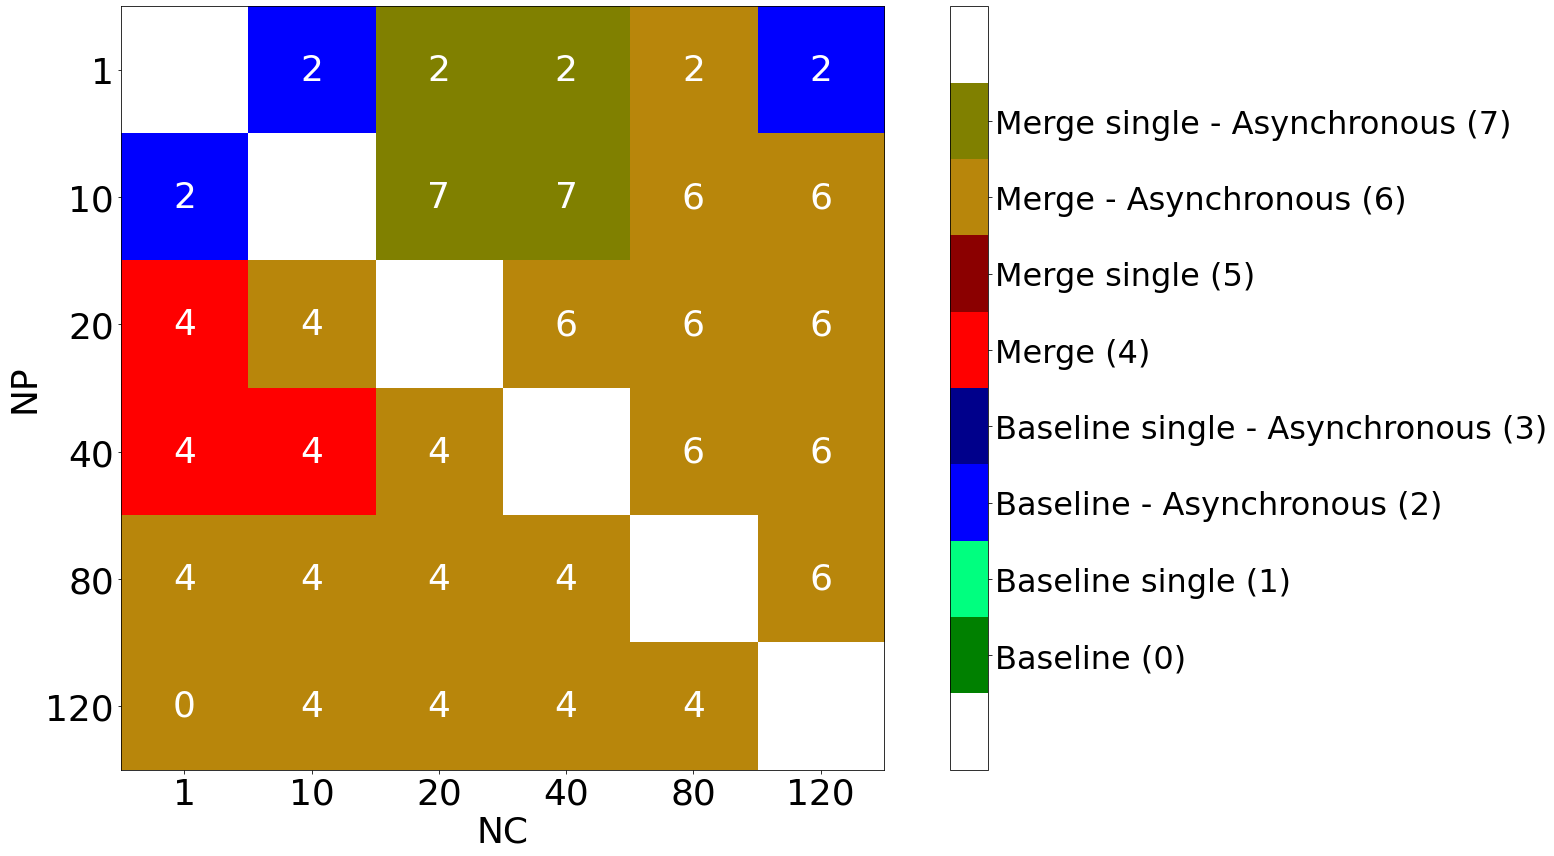

In [44]:
#Crea un heatmap teniendo en cuenta los colores anteriores
f=plt.figure(figsize=(24, 12))
ax=f.add_subplot(111)

myColors = (colors.to_rgba("white"),colors.to_rgba("green"), colors.to_rgba("springgreen"),colors.to_rgba("blue"),colors.to_rgba("darkblue"),
            colors.to_rgba("red"),colors.to_rgba("darkred"),colors.to_rgba("darkgoldenrod"),colors.to_rgba("olive"),colors.to_rgba("white"))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

im = ax.imshow(heatmap,cmap=cmap,interpolation='nearest')

# Loop over data dimensions and create text annotations.
used_aux=0
for i in range(len(processes)):
    for j in range(len(processes)):
        if i!=j:
            aux_color="white"
            if heatmap[i, j] == 1: # El 1 puede necesitar texto en negro
                aux_color="black"
            results_index = i*len(processes) +j-used_aux
            if len(results_str[results_index]) == 1:
                text = results_str[results_index][0]
                ax.text(j, i, text, ha="center", va="center", color=aux_color, fontsize=36)
            else:
                add_aux = 0.33
                for line in range(len(results_str[results_index])):
                    i_range = i - 0.5 + add_aux
                    ax.text(j, i_range, results_str[results_index][line],
                            ha="center", va="center", color=aux_color, fontsize=36)
                    add_aux+=0.33
        else:
            used_aux+=1

ax.set_ylabel("NP", fontsize=36)
ax.set_xlabel("NC", fontsize=36)

ax.set_xticklabels(['']+processes, fontsize=36)
ax.set_yticklabels(['']+processes, fontsize=36)

#
labelsMethods_aux = ['Baseline (0)', 'Baseline single (1)','Baseline - Asynchronous (2)','Baseline single - Asynchronous (3)',
                 'Merge (4)','Merge single (5)','Merge - Asynchronous (6)','Merge single - Asynchronous (7)']
colorbar=f.colorbar(im, ax=ax)
colorbar.set_ticks([0.35, 1.25, 2.15, 3.05, 3.95, 4.85, 5.75, 6.65]) #TE
#colorbar.set_ticks([-2.55, 0.35, 1.25, 2.15, 3.05, 3.95, 4.85, 5.75, 6.65]) #TC
colorbar.set_ticklabels(labelsMethods_aux)
colorbar.ax.tick_params(labelsize=32)
#

f.tight_layout()
f.savefig("Images/Spawn/Heatmap_"+tipo+".png", format="png")

In [2]:
tipo="bcast"
if tipo == "bcast":
    #bcast
    x = [0.000002, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000001, 0.000000, 0.000000, 0.000000, 0.000000, 0.000001, 0.000001, 0.000001, 0.000000, 0.000001, 0.000001, 0.000001, 0.000001, 0.000000, 0.000001, 0.000001, 0.000001, 0.000001, 0.000000, 0.000000, 0.000001, 0.000001, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000001, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000001, 0.000001, 0.000001, 0.000000, 0.000000, 0.000000, 0.000000, 0.000001, 0.000001, 0.000000, 0.000000, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000000, 0.000001, 0.000001, 0.000002, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000002, 0.000001, 0.000002, 0.000002, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000002, 0.000001, 0.000001, 0.000001, 0.000001, 0.000002, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000002, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000002, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000002, 0.000001, 0.000001, 0.000001, 0.000001, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000001, 0.000001, 0.000002, 0.000001, 0.000002, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000001, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000001, 0.000001, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000001, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000001, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000001, 0.000003, 0.000002, 0.000002, 0.000001, 0.000002, 0.000002, 0.000002, 0.000002, 0.000001, 0.000002, 0.000002, 0.000002, 0.000001, 0.000002, 0.000002, 0.000001, 0.000018, 0.000002, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000008, 0.000003, 0.000003, 0.000008, 0.000002, 0.000002, 0.000003, 0.000003, 0.000003, 0.000002, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000002, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000002, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000002, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000002, 0.000003, 0.000003, 0.000002, 0.000002, 0.000003, 0.000003, 0.000003, 0.000002, 0.000003, 0.000003, 0.000003, 0.000020, 0.000009, 0.000011, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000005, 0.000004, 0.000004, 0.000005, 0.000004, 0.000005, 0.000005, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000005, 0.000005, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000005, 0.000004, 0.000005, 0.000005, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000005, 0.000005, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000005, 0.000004, 0.000004, 0.000005, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000011, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000005, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000005, 0.000011, 0.000004, 0.000004, 0.000004, 0.000005, 0.000092, 0.000018, 0.000019, 0.000019, 0.000019, 0.000019, 0.000019, 0.000019, 0.000019, 0.000019, 0.000019, 0.000018, 0.000018, 0.000018, 0.000019, 0.000024, 0.000019, 0.000018, 0.000018, 0.000018, 0.000018, 0.000018, 0.000018, 0.000018, 0.000018, 0.000019, 0.000018, 0.000018, 0.000018, 0.000019, 0.000018, 0.000019, 0.000019, 0.000019, 0.000019, 0.000018, 0.000019, 0.000019, 0.000018, 0.000019, 0.000019, 0.000019, 0.000018, 0.000019, 0.000019, 0.000019, 0.000019, 0.000019, 0.000019, 0.000018, 0.000019, 0.000018, 0.000019, 0.000019, 0.000019, 0.000019, 0.000019, 0.000019, 0.000019, 0.000019, 0.000019, 0.000019, 0.000019, 0.000019, 0.000019, 0.000018, 0.000019, 0.000018, 0.000019, 0.000019, 0.000019, 0.000019, 0.000018, 0.000019, 0.000019, 0.000018, 0.000019, 0.000019, 0.000019, 0.000019, 0.000018, 0.000018, 0.000019, 0.000019, 0.000019, 0.000019, 0.000018, 0.000019, 0.000019, 0.000019, 0.000019, 0.000019, 0.000018, 0.000019, 0.000018, 0.000018, 0.000019, 0.000019, 0.000018, 0.000019, 0.000130, 0.000028, 0.000027, 0.000027, 0.000026, 0.000027, 0.000027, 0.000027, 0.000027, 0.000027, 0.000027, 0.000027, 0.000027, 0.000026, 0.000027, 0.000026, 0.000026, 0.000027, 0.000026, 0.000027, 0.000027, 0.000027, 0.000026, 0.000027, 0.000026, 0.000027, 0.000027, 0.000026, 0.000027, 0.000026, 0.000028, 0.000026, 0.000027, 0.000027, 0.000027, 0.000026, 0.000027, 0.000027, 0.000027, 0.000027, 0.000027, 0.000027, 0.000026, 0.000027, 0.000026, 0.000026, 0.000026, 0.000027, 0.000026, 0.000027, 0.000027, 0.000026, 0.000027, 0.000026, 0.000027, 0.000027, 0.000027, 0.000026, 0.000027, 0.000027, 0.000027, 0.000027, 0.000027, 0.000026, 0.000027, 0.000027, 0.000027, 0.000027, 0.000027, 0.000027, 0.000027, 0.000028, 0.000027, 0.000026, 0.000030, 0.000027, 0.000027, 0.000027, 0.000027, 0.000027, 0.000027, 0.000026, 0.000027, 0.000027, 0.000027, 0.000027, 0.000027, 0.000026, 0.000026, 0.000027, 0.000027, 0.000027, 0.000027, 0.000027, 0.000027, 0.000027, 0.000027, 0.000027, 0.000027, 0.000027, 0.000283, 0.000106, 0.000106, 0.000106, 0.000106, 0.000106, 0.000106, 0.000106, 0.000106, 0.000106, 0.000107, 0.000107, 0.000108, 0.000107, 0.000106, 0.000107, 0.000106, 0.000106, 0.000108, 0.000107, 0.000106, 0.000106, 0.000106, 0.000107, 0.000107, 0.000107, 0.000107, 0.000107, 0.000110, 0.000107, 0.000107, 0.000107, 0.000108, 0.000106, 0.000107, 0.000106, 0.000106, 0.000107, 0.000107, 0.000106, 0.000107, 0.000107, 0.000106, 0.000107, 0.000107, 0.000106, 0.000106, 0.000106, 0.000107, 0.000106, 0.000106, 0.000107, 0.000106, 0.000106, 0.000106, 0.000107, 0.000107, 0.000107, 0.000107, 0.000107, 0.000106, 0.000106, 0.000107, 0.000107, 0.000107, 0.000110, 0.000107, 0.000107, 0.000107, 0.000106, 0.000106, 0.000107, 0.000106, 0.000106, 0.000106, 0.000106, 0.000106, 0.000106, 0.000106, 0.000106, 0.000106, 0.000106, 0.000107, 0.000106, 0.000107, 0.000106, 0.000106, 0.000107, 0.000106, 0.000107, 0.000106, 0.000107, 0.000107, 0.000106, 0.000106, 0.000107, 0.000107, 0.000106, 0.000107, 0.000106, 0.000524, 0.000207, 0.000204, 0.000207, 0.000206, 0.000206, 0.000205, 0.000206, 0.000205, 0.000206, 0.000205, 0.000205, 0.000206, 0.000206, 0.000206, 0.000206, 0.000205, 0.000205, 0.000210, 0.000205, 0.000205, 0.000205, 0.000206, 0.000206, 0.000206, 0.000206, 0.000206, 0.000205, 0.000206, 0.000206, 0.000205, 0.000205, 0.000205, 0.000205, 0.000208, 0.000205, 0.000207, 0.000211, 0.000206, 0.000205, 0.000206, 0.000206, 0.000206, 0.000206, 0.000205, 0.000206, 0.000207, 0.000205, 0.000206, 0.000207, 0.000207, 0.000205, 0.000206, 0.000206, 0.000206, 0.000206, 0.000206, 0.000209, 0.000205, 0.000205, 0.000206, 0.000205, 0.000205, 0.000206, 0.000205, 0.000205, 0.000206, 0.000206, 0.000206, 0.000205, 0.000206, 0.000205, 0.000206, 0.000206, 0.000206, 0.000206, 0.000210, 0.000204, 0.000206, 0.000206, 0.000206, 0.000205, 0.000205, 0.000205, 0.000206, 0.000205, 0.000206, 0.000205, 0.000206, 0.000206, 0.000205, 0.000207, 0.000205, 0.000207, 0.000206, 0.000209, 0.000205, 0.000205, 0.000206, 0.000205, 0.005969, 0.002010, 0.002004, 0.002009, 0.002005, 0.002008, 0.002003, 0.002006, 0.002007, 0.002007, 0.002003, 0.002008, 0.002003, 0.002009, 0.002004, 0.002009, 0.002003, 0.002008, 0.002005, 0.002007, 0.002003, 0.002008, 0.002005, 0.002008, 0.002005, 0.002005, 0.002003, 0.002007, 0.002002, 0.002007, 0.002003, 0.002007, 0.002004, 0.002006, 0.002002, 0.002007, 0.002003, 0.002006, 0.002004, 0.002005, 0.002002, 0.002004, 0.002002, 0.002005, 0.002002, 0.002005, 0.002002, 0.002007, 0.002003, 0.002007, 0.002002, 0.002009, 0.002002, 0.002005, 0.002004, 0.002008, 0.002003, 0.002007, 0.002003, 0.002003, 0.002003, 0.002010, 0.002003, 0.002005, 0.002000, 0.002007, 0.002002, 0.002009, 0.002001, 0.002006, 0.002002, 0.002006, 0.002001, 0.001998, 0.002001, 0.002010, 0.002002, 0.002003, 0.002000, 0.002007, 0.002004, 0.002008, 0.002001, 0.002004, 0.002005, 0.002006, 0.002001, 0.002007, 0.002002, 0.002009, 0.002001, 0.002005, 0.002003, 0.002008, 0.001999, 0.002004, 0.002002, 0.002005, 0.002003, 0.002006, \
     0.059939, 0.024504, 0.022647, 0.022617, 0.021730, 0.024531, 0.024927, 0.024392, 0.024493, 0.024490, 0.024438, 0.021964, 0.021842, 0.024483, 0.021804, 0.024507, 0.024354, 0.024353, 0.024456, 0.022079, 0.024322, 0.024579, 0.022457, 0.024401, 0.024604, 0.024532, 0.023252, 0.023547, 0.023316, 0.021491, 0.024583, 0.024424, 0.024541, 0.022293, 0.024417, 0.023698, 0.024408, 0.021841, 0.023707, 0.023017, 0.024536, 0.024420, 0.021870, 0.021531, 0.022964, 0.023716, 0.024605, 0.024343, 0.024588, 0.022115, 0.021860, 0.023939, 0.021542, 0.024609, 0.024339, 0.022058, 0.024504, 0.024357, 0.024535, 0.021893, 0.024482, 0.022914, 0.022199, 0.024370, 0.024429, 0.024554, 0.023071, 0.023255, 0.023273, 0.024601, 0.022383, 0.024586, 0.022459, 0.024462, 0.022297, 0.024515, 0.021501, 0.023307, 0.023315, 0.021560, 0.024507, 0.023080, 0.022861, 0.022383, 0.024513, 0.022016, 0.022958, 0.022520, 0.021587, 0.024413, 0.022460, 0.023133, 0.021825, 0.023516, 0.022206, 0.023532, 0.024548, 0.022841, 0.024491, 0.023761]
    slope = 4082094463.008053
    intercept = 417444.446452
elif tipo == "allgather":
    x = [0.000005, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000002, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000002, 0.000001, 0.000002, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000002, 0.000002, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000002, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000002, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000002, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000002, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000002, 0.000002, 0.000002, 0.000001, 0.000001, 0.000002, 0.000002, 0.000002, 0.000001, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000001, 0.000002, 0.000002, 0.000002, 0.000001, 0.000001, 0.000002, 0.000002, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000001, 0.000002, 0.000002, 0.000002, 0.000001, 0.000001, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000001, 0.000001, 0.000002, 0.000002, 0.000001, 0.000001, 0.000002, 0.000001, 0.000001, 0.000001, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000001, 0.000002, 0.000002, 0.000002, 0.000001, 0.000002, 0.000001, 0.000002, 0.000002, 0.000002, 0.000001, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000001, 0.000001, 0.000001, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000009, 0.000003, 0.000003, 0.000003, 0.000002, 0.000003, 0.000003, 0.000002, 0.000002, 0.000002, 0.000003, 0.000003, 0.000003, 0.000002, 0.000002, 0.000003, 0.000002, 0.000003, 0.000003, 0.000003, 0.000002, 0.000002, 0.000002, 0.000002, 0.000003, 0.000003, 0.000002, 0.000002, 0.000002, 0.000003, 0.000003, 0.000003, 0.000003, 0.000002, 0.000003, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000004, 0.000003, 0.000002, 0.000004, 0.000004, 0.000003, 0.000003, 0.000004, 0.000003, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000003, 0.000004, 0.000002, 0.000002, 0.000002, 0.000002, 0.000003, 0.000003, 0.000003, 0.000003, 0.000002, 0.000003, 0.000002, 0.000003, 0.000004, 0.000002, 0.000003, 0.000003, 0.000003, 0.000002, 0.000002, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000004, 0.000002, 0.000003, 0.000003, 0.000003, 0.000002, 0.000002, 0.000002, 0.000003, 0.000003, 0.000003, 0.000004, 0.000002, 0.000003, 0.000003, 0.000004, 0.000004, 0.000003, 0.000003, 0.000003, 0.000004, 0.000003, 0.000003, 0.000003, 0.000004, 0.000003, 0.000003, 0.000003, 0.000004, 0.000003, 0.000003, 0.000004, 0.000004, 0.000003, 0.000004, 0.000003, 0.000003, 0.000004, 0.000003, 0.000003, 0.000004, 0.000004, 0.000003, 0.000004, 0.000004, 0.000003, 0.000004, 0.000003, 0.000003, 0.000003, 0.000003, 0.000004, 0.000003, 0.000003, 0.000003, 0.000003, 0.000004, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000004, 0.000003, 0.000003, 0.000003, 0.000004, 0.000003, 0.000003, 0.000003, 0.000003, 0.000004, 0.000003, 0.000003, 0.000004, 0.000003, 0.000003, 0.000004, 0.000003, 0.000003, 0.000004, 0.000003, 0.000004, 0.000004, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000004, 0.000003, 0.000003, 0.000003, 0.000003, 0.000004, 0.000003, 0.000003, 0.000004, 0.000003, 0.000003, 0.000004, 0.000003, 0.000003, 0.000003, 0.000040, 0.000014, 0.000013, 0.000014, 0.000013, 0.000013, 0.000014, 0.000018, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000013, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000014, 0.000153, 0.000026, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000030, 0.000025, 0.000025, 0.000025, 0.000025, 0.000026, 0.000025, 0.000025, 0.000025, 0.000025, 0.000025, 0.000782, 0.000138, 0.000137, 0.000135, 0.000135, 0.000135, 0.000139, 0.000133, 0.000136, 0.000137, 0.000136, 0.000132, 0.000134, 0.000136, 0.000134, 0.000134, 0.000134, 0.000136, 0.000137, 0.000133, 0.000135, 0.000135, 0.000145, 0.000137, 0.000132, 0.000133, 0.000134, 0.000135, 0.000136, 0.000133, 0.000134, 0.000134, 0.000135, 0.000138, 0.000138, 0.000135, 0.000135, 0.000134, 0.000134, 0.000134, 0.000137, 0.000130, 0.000149, 0.000127, 0.000129, 0.000146, 0.000131, 0.000146, 0.000146, 0.000131, 0.000128, 0.000156, 0.000147, 0.000131, 0.000147, 0.000129, 0.000128, 0.000128, 0.000129, 0.000129, 0.000148, 0.000128, 0.000131, 0.000147, 0.000146, 0.000130, 0.000131, 0.000130, 0.000130, 0.000149, 0.000127, 0.000127, 0.000147, 0.000129, 0.000128, 0.000131, 0.000128, 0.000130, 0.000131, 0.000132, 0.000137, 0.000149, 0.000147, 0.000130, 0.000128, 0.000131, 0.000130, 0.000129, 0.000130, 0.000131, 0.000131, 0.000131, 0.000132, 0.000131, 0.000133, 0.000131, 0.000147, 0.000127, 0.000130, 0.000130, 0.000587, 0.000360, 0.000360, 0.000346, 0.000325, 0.000384, 0.000363, 0.000362, 0.000356, 0.000357, 0.000374, 0.000360, 0.000249, 0.000228, 0.000300, 0.000298, 0.000231, 0.000232, 0.000231, 0.000246, 0.000317, 0.000229, 0.000228, 0.000230, 0.000271, 0.000227, 0.000291, 0.000230, 0.000230, 0.000275, 0.000289, 0.000229, 0.000234, 0.000229, 0.000272, 0.000234, 0.000265, 0.000289, 0.000224, 0.000230, 0.000230, 0.000282, 0.000230, 0.000270, 0.000229, 0.000270, 0.000265, 0.000272, 0.000226, 0.000277, 0.000233, 0.000272, 0.000269, 0.000250, 0.000267, 0.000231, 0.000230, 0.000273, 0.000228, 0.000251, 0.000230, 0.000270, 0.000237, 0.000229, 0.000231, 0.000228, 0.000229, 0.000232, 0.000226, 0.000228, 0.000229, 0.000227, 0.000232, 0.000231, 0.000235, 0.000232, 0.000231, 0.000229, 0.000229, 0.000235, 0.000229, 0.000229, 0.000228, 0.000230, 0.000227, 0.000231, 0.000232, 0.000230, 0.000232, 0.000230, 0.000228, 0.000227, 0.000230, 0.000230, 0.000228, 0.000229, 0.000230, 0.000239, 0.000226, 0.000232, 0.008453, 0.002773, 0.002651, 0.002620, 0.002595, 0.002599, 0.002608, 0.002590, 0.002587, 0.002611, 0.002604, 0.002601, 0.002602, 0.002620, 0.002609, 0.002605, 0.002601, 0.002596, 0.002605, 0.002584, 0.002611, 0.002620, 0.002576, 0.002608, 0.002603, 0.002595, 0.002594, 0.002603, 0.002583, 0.002613, 0.002596, 0.002595, 0.002603, 0.002591, 0.002610, 0.002594, 0.002589, 0.002610, 0.002610, 0.002601, 0.002610, 0.002603, 0.002598, 0.002608, 0.002585, 0.002601, 0.002619, 0.002608, 0.002604, 0.002599, 0.002587, 0.002600, 0.002607, 0.002604, 0.002603, 0.002596, 0.002588, 0.002595, 0.002612, 0.002595, 0.002600, 0.002629, 0.002603, 0.002607, 0.002600, 0.002606, 0.002601, 0.002594, 0.002586, 0.002604, 0.002613, 0.002591, 0.002603, 0.002574, 0.002598, 0.002601, 0.002602, 0.002602, 0.002603, 0.002605, 0.002606, 0.002607, 0.002597, 0.002594, 0.002636, 0.002610, 0.002588, 0.002592, 0.002596, 0.002610, 0.002588, 0.002610, 0.002603, 0.002589, 0.002605, 0.002591, 0.002592, 0.002603, 0.002600, 0.002587, 0.095241, 0.035323, 0.035436, 0.035495, 0.035372, 0.035416, 0.035370, 0.035460, 0.035349, 0.035391, 0.035311, 0.035361, 0.035788, 0.035438, 0.035445, 0.035413, 0.035373, 0.035374, 0.035439, 0.035290, 0.035410, 0.035385, 0.035388, 0.035343, 0.035442, 0.035397, 0.035465, 0.036605, 0.035349, 0.035452, 0.035376, 0.035346, 0.035300, 0.035460, 0.035489, 0.035378, 0.035386, 0.035411, 0.035286, 0.035385, 0.035861, 0.035421, 0.035394, 0.035460, 0.035376, 0.035440, 0.035376, 0.035399, 0.035340, 0.035370, 0.035394, 0.035392, 0.035422, 0.035355, 0.035430, 0.035359, 0.036654, 0.035536, 0.035551, 0.035610, 0.035458, 0.035432, 0.035474, 0.035417, 0.035408, 0.035440, 0.035370, 0.035402, 0.035862, 0.035428, 0.035367, 0.035472, 0.035410, 0.035424, 0.035393, 0.035441, 0.035400, 0.035416, 0.035470, 0.035439, 0.035349, 0.035427, 0.035453, 0.035450, 0.036583, 0.035463, 0.035498, 0.035426, 0.035356, 0.035369, 0.035412, 0.035461, 0.035339, 0.035395, 0.035427, 0.035445, 0.035902, 0.035391, 0.035375, 0.035333]
    slope = 2687592726.595444
    intercept = 580231.389302
elif tipo == "reduce":
    x = [0.000002, 0.000002, 0.000001, 0.000001, 0.000002, 0.000001, 0.000001, 0.000001, 0.000002, 0.000001, 0.000001, 0.000001, 0.000002, 0.000001, 0.000001, 0.000002, 0.000001, 0.000002, 0.000001, 0.000001, 0.000002, 0.000002, 0.000001, 0.000001, 0.000002, 0.000001, 0.000002, 0.000001, 0.000002, 0.000002, 0.000002, 0.000001, 0.000001, 0.000002, 0.000001, 0.000001, 0.000002, 0.000001, 0.000002, 0.000002, 0.000001, 0.000002, 0.000002, 0.000001, 0.000002, 0.000002, 0.000001, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000001, 0.000001, 0.000001, 0.000001, 0.000002, 0.000001, 0.000002, 0.000002, 0.000001, 0.000001, 0.000002, 0.000002, 0.000001, 0.000002, 0.000001, 0.000001, 0.000001, 0.000002, 0.000002, 0.000001, 0.000001, 0.000001, 0.000002, 0.000001, 0.000001, 0.000002, 0.000002, 0.000001, 0.000001, 0.000002, 0.000001, 0.000002, 0.000001, 0.000002, 0.000001, 0.000001, 0.000001, 0.000002, 0.000001, 0.000002, 0.000002, 0.000001, 0.000002, 0.000002, 0.000002, 0.000002, 0.000001, 0.000001, 0.000002, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000004, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000004, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000004, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000004, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000008, 0.000008, 0.000007, 0.000007, 0.000007, 0.000007, 0.000007, 0.000007, 0.000007, 0.000007, 0.000007, 0.000007, 0.000007, 0.000007, 0.000007, 0.000006, 0.000007, 0.000007, 0.000007, 0.000007, 0.000007, 0.000006, 0.000006, 0.000007, 0.000006, 0.000007, 0.000006, 0.000007, 0.000007, 0.000006, 0.000006, 0.000006, 0.000006, 0.000006, 0.000007, 0.000007, 0.000007, 0.000006, 0.000006, 0.000006, 0.000006, 0.000006, 0.000007, 0.000007, 0.000007, 0.000007, 0.000007, 0.000006, 0.000007, 0.000006, 0.000007, 0.000006, 0.000007, 0.000007, 0.000007, 0.000006, 0.000006, 0.000007, 0.000007, 0.000007, 0.000007, 0.000007, 0.000006, 0.000007, 0.000007, 0.000007, 0.000007, 0.000007, 0.000006, 0.000007, 0.000006, 0.000007, 0.000006, 0.000006, 0.000006, 0.000006, 0.000006, 0.000007, 0.000007, 0.000006, 0.000007, 0.000006, 0.000007, 0.000006, 0.000007, 0.000006, 0.000007, 0.000007, 0.000006, 0.000007, 0.000007, 0.000006, 0.000006, 0.000007, 0.000007, 0.000007, 0.000006, 0.000007, 0.000006, 0.000006, 0.000031, 0.000010, 0.000010, 0.000010, 0.000010, 0.000011, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000011, 0.000011, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000015, 0.000010, 0.000010, 0.000011, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000011, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000052, 0.000039, 0.000039, 0.000039, 0.000039, 0.000039, 0.000040, 0.000039, 0.000040, 0.000039, 0.000040, 0.000040, 0.000039, 0.000040, 0.000040, 0.000039, 0.000039, 0.000040, 0.000039, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000039, 0.000039, 0.000040, 0.000039, 0.000039, 0.000039, 0.000039, 0.000040, 0.000040, 0.000039, 0.000039, 0.000040, 0.000040, 0.000039, 0.000039, 0.000039, 0.000039, 0.000039, 0.000039, 0.000039, 0.000040, 0.000040, 0.000040, 0.000040, 0.000039, 0.000039, 0.000039, 0.000039, 0.000039, 0.000039, 0.000039, 0.000039, 0.000039, 0.000040, 0.000039, 0.000039, 0.000039, 0.000039, 0.000039, 0.000039, 0.000039, 0.000039, 0.000039, 0.000039, 0.000039, 0.000040, 0.000039, 0.000039, 0.000039, 0.000039, 0.000039, 0.000039, 0.000039, 0.000039, 0.000039, 0.000039, 0.000038, 0.000039, 0.000040, 0.000039, 0.000041, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000137, 0.000076, 0.000077, 0.000077, 0.000075, 0.000076, 0.000076, 0.000076, 0.000076, 0.000076, 0.000076, 0.000076, 0.000077, 0.000076, 0.000076, 0.000075, 0.000075, 0.000075, 0.000075, 0.000075, 0.000075, 0.000076, 0.000075, 0.000075, 0.000076, 0.000075, 0.000075, 0.000075, 0.000075, 0.000075, 0.000075, 0.000075, 0.000076, 0.000076, 0.000076, 0.000077, 0.000076, 0.000077, 0.000077, 0.000076, 0.000076, 0.000076, 0.000081, 0.000077, 0.000077, 0.000077, 0.000077, 0.000077, 0.000076, 0.000077, 0.000077, 0.000077, 0.000077, 0.000077, 0.000077, 0.000077, 0.000076, 0.000077, 0.000076, 0.000076, 0.000075, 0.000075, 0.000075, 0.000075, 0.000075, 0.000076, 0.000076, 0.000075, 0.000075, 0.000075, 0.000075, 0.000075, 0.000075, 0.000076, 0.000075, 0.000075, 0.000077, 0.000076, 0.000076, 0.000076, 0.000076, 0.000075, 0.000076, 0.000076, 0.000076, 0.000076, 0.000076, 0.000076, 0.000076, 0.000076, 0.000075, 0.000076, 0.000076, 0.000080, 0.000076, 0.000076, 0.000076, 0.000076, 0.000076, 0.000076, 0.000696, 0.000410, 0.000402, 0.000388, 0.000401, 0.000386, 0.000387, 0.000385, 0.000391, 0.000397, 0.000384, 0.000393, 0.000383, 0.000386, 0.000390, 0.000382, 0.000396, 0.000379, 0.000388, 0.000379, 0.000393, 0.000382, 0.000381, 0.000376, 0.000392, 0.000395, 0.000382, 0.000396, 0.000412, 0.000386, 0.000384, 0.000383, 0.000380, 0.000392, 0.000394, 0.000393, 0.000382, 0.000395, 0.000393, 0.000382, 0.000380, 0.000383, 0.000381, 0.000390, 0.000396, 0.000382, 0.000382, 0.000395, 0.000393, 0.000408, 0.000385, 0.000383, 0.000380, 0.000389, 0.000380, 0.000393, 0.000384, 0.000380, 0.000391, 0.000398, 0.000399, 0.000397, 0.000383, 0.000379, 0.000379, 0.000394, 0.000384, 0.000394, 0.000380, 0.000391, 0.000381, 0.000392, 0.000392, 0.000381, 0.000392, 0.000392, 0.000381, 0.000392, 0.000383, 0.000399, 0.000383, 0.000378, 0.000392, 0.000382, 0.000394, 0.000384, 0.000392, 0.000380, 0.000395, 0.000394, 0.000389, 0.000390, 0.000396, 0.000382, 0.000389, 0.000384, 0.000391, 0.000381, 0.000391, 0.000381, 0.001741, 0.000802, 0.000788, 0.000788, 0.000793, 0.000785, 0.000793, 0.000786, 0.000787, 0.000793, 0.000799, 0.000794, 0.000794, 0.000794, 0.000791, 0.000791, 0.000788, 0.000800, 0.000786, 0.000799, 0.000797, 0.000788, 0.000788, 0.000784, 0.000797, 0.000789, 0.000795, 0.000784, 0.000793, 0.000793, 0.000790, 0.000787, 0.000791, 0.000784, 0.000800, 0.000785, 0.000793, 0.000781, 0.000792, 0.000801, 0.000798, 0.000784, 0.000785, 0.000794, 0.000792, 0.000787, 0.000790, 0.000785, 0.000790, 0.000797, 0.000784, 0.000788, 0.000784, 0.000789, 0.000799, 0.000790, 0.000787, 0.000787, 0.000782, 0.000793, 0.000787, 0.000795, 0.000794, 0.000789, 0.000788, 0.000787, 0.000785, 0.000796, 0.000789, 0.000793, 0.000797, 0.000789, 0.000786, 0.000792, 0.000791, 0.000793, 0.000785, 0.000787, 0.000799, 0.000797, 0.000797, 0.000790, 0.000787, 0.000786, 0.000791, 0.000783, 0.000796, 0.000788, 0.000789, 0.000796, 0.000794, 0.000789, 0.000790, 0.000794, 0.000797, 0.000797, 0.000790, 0.000795, 0.000787, 0.000802, 0.018145, 0.015328, 0.015118, 0.015063, 0.015098, 0.014784, 0.014776, 0.014997, 0.015058, 0.015074, 0.014742, 0.014988, 0.015080, 0.014913, 0.015067, 0.015086, 0.015057, 0.015063, 0.015127, 0.015055, 0.015269, 0.015070, 0.015052, 0.015068, 0.015094, 0.015046, 0.015077, 0.015047, 0.014995, 0.015023, 0.014766, 0.014991, 0.014748, 0.014705, 0.014712, 0.015055, 0.015042, 0.014935, 0.015047, 0.014909, 0.014964, 0.015038, 0.015081, 0.015029, 0.015014, 0.015061, 0.015025, 0.015004, 0.015084, 0.015372, 0.015042, 0.014760, 0.015019, 0.014912, 0.015069, 0.015075, 0.014784, 0.015031, 0.015057, 0.015081, 0.015076, 0.015090, 0.015131, 0.015033, 0.015100, 0.015033, 0.015083, 0.014949, 0.015067, 0.015039, 0.014914, 0.015097, 0.014904, 0.015104, 0.014794, 0.015049, 0.015035, 0.015092, 0.015045, 0.014772, 0.015035, 0.015043, 0.015054, 0.015038, 0.015079, 0.015073, 0.015019, 0.015157, 0.015047, 0.014749, 0.014993, 0.015041, 0.015041, 0.015040, 0.015067, 0.015038, 0.015028, 0.015061, 0.015046, 0.015078, 0.212262, 0.185519, 0.186501, 0.185577, 0.184211, 0.186465, 0.186450, 0.184698, 0.186418, 0.187905, 0.184845, 0.186531, 0.186257, 0.185822, 0.186243, 0.186422, 0.186409, 0.185711, 0.183737, 0.185731, 0.186490, 0.186310, 0.185192, 0.184908, 0.186227, 0.185352, 0.186196, 0.186155, 0.186595, 0.186488, 0.185232, 0.186730, 0.185376, 0.185484, 0.183967, 0.186260, 0.187787, 0.186347, 0.186786, 0.186759, 0.186337, 0.186301, 0.183724, 0.183987, 0.184885, 0.183833, 0.186412, 0.188206, 0.185502, 0.184851, 0.186307, 0.185276, 0.184040, 0.184446, 0.186701, 0.186171, 0.185102, 0.186611, 0.187794, 0.185968, 0.186484, 0.183984, 0.186410, 0.187853, 0.186458, 0.186824, 0.184836, 0.186633, 0.187585, 0.185583, 0.183682, 0.186466, 0.183998, 0.185895, 0.185598, 0.186250, 0.186450, 0.184682, 0.186286, 0.185970, 0.186335, 0.184139, 0.183826, 0.186421, 0.186308, 0.188077, 0.185633, 0.184551, 0.186465, 0.186632, 0.186535, 0.186291, 0.186495, 0.186824, 0.186735, 0.185877, 0.187918, 0.186703, 0.186134, 0.186532]
    slope = 536190943.875754
    intercept = 277159.974610
elif tipo == "allreduce":
    x = [0.000007, 0.000003, 0.000002, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000004, 0.000002, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000002, 0.000003, 0.000002, 0.000003, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000002, 0.000003, 0.000002, 0.000003, 0.000003, 0.000002, 0.000002, 0.000002, 0.000004, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000005, 0.000003, 0.000003, 0.000003, 0.000002, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000002, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000002, 0.000003, 0.000002, 0.000003, 0.000003, 0.000003, 0.000002, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000002, 0.000003, 0.000002, 0.000003, 0.000003, 0.000003, 0.000002, 0.000003, 0.000002, 0.000003, 0.000002, 0.000003, 0.000002, 0.000003, 0.000002, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000002, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000002, 0.000003, 0.000002, 0.000004, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000003, 0.000002, 0.000003, 0.000003, 0.000004, 0.000005, 0.000005, 0.000005, 0.000005, 0.000005, 0.000004, 0.000005, 0.000003, 0.000005, 0.000004, 0.000005, 0.000004, 0.000006, 0.000006, 0.000006, 0.000005, 0.000005, 0.000005, 0.000005, 0.000004, 0.000004, 0.000004, 0.000005, 0.000003, 0.000004, 0.000003, 0.000004, 0.000004, 0.000004, 0.000004, 0.000005, 0.000004, 0.000005, 0.000004, 0.000004, 0.000003, 0.000005, 0.000004, 0.000005, 0.000004, 0.000004, 0.000003, 0.000005, 0.000005, 0.000005, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000005, 0.000005, 0.000006, 0.000006, 0.000005, 0.000004, 0.000005, 0.000004, 0.000004, 0.000004, 0.000004, 0.000004, 0.000005, 0.000004, 0.000005, 0.000004, 0.000004, 0.000003, 0.000005, 0.000004, 0.000005, 0.000004, 0.000004, 0.000004, 0.000005, 0.000004, 0.000005, 0.000004, 0.000004, 0.000005, 0.000004, 0.000004, 0.000004, 0.000005, 0.000004, 0.000004, 0.000005, 0.000006, 0.000007, 0.000005, 0.000005, 0.000005, 0.000005, 0.000005, 0.000004, 0.000004, 0.000005, 0.000005, 0.000004, 0.000008, 0.000007, 0.000008, 0.000007, 0.000007, 0.000007, 0.000007, 0.000008, 0.000007, 0.000008, 0.000007, 0.000008, 0.000007, 0.000006, 0.000008, 0.000007, 0.000008, 0.000007, 0.000007, 0.000006, 0.000007, 0.000007, 0.000007, 0.000007, 0.000007, 0.000007, 0.000006, 0.000007, 0.000006, 0.000007, 0.000006, 0.000006, 0.000006, 0.000006, 0.000007, 0.000007, 0.000006, 0.000008, 0.000006, 0.000007, 0.000007, 0.000007, 0.000014, 0.000007, 0.000006, 0.000007, 0.000007, 0.000007, 0.000007, 0.000006, 0.000007, 0.000007, 0.000006, 0.000006, 0.000006, 0.000008, 0.000006, 0.000007, 0.000007, 0.000006, 0.000006, 0.000007, 0.000007, 0.000007, 0.000006, 0.000007, 0.000007, 0.000007, 0.000007, 0.000006, 0.000007, 0.000007, 0.000006, 0.000007, 0.000007, 0.000008, 0.000006, 0.000006, 0.000007, 0.000007, 0.000007, 0.000006, 0.000007, 0.000007, 0.000006, 0.000007, 0.000007, 0.000007, 0.000007, 0.000007, 0.000006, 0.000006, 0.000006, 0.000008, 0.000006, 0.000006, 0.000007, 0.000007, 0.000007, 0.000007, 0.000011, 0.000011, 0.000010, 0.000011, 0.000011, 0.000011, 0.000010, 0.000010, 0.000011, 0.000011, 0.000011, 0.000011, 0.000010, 0.000011, 0.000010, 0.000011, 0.000011, 0.000010, 0.000011, 0.000010, 0.000010, 0.000011, 0.000010, 0.000011, 0.000010, 0.000010, 0.000010, 0.000011, 0.000011, 0.000010, 0.000010, 0.000010, 0.000011, 0.000010, 0.000011, 0.000010, 0.000010, 0.000010, 0.000010, 0.000011, 0.000010, 0.000010, 0.000011, 0.000011, 0.000011, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000011, 0.000010, 0.000011, 0.000010, 0.000010, 0.000010, 0.000010, 0.000011, 0.000010, 0.000011, 0.000011, 0.000011, 0.000011, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000011, 0.000012, 0.000010, 0.000010, 0.000010, 0.000010, 0.000011, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000010, 0.000011, 0.000012, 0.000011, 0.000010, 0.000012, 0.000010, 0.000010, 0.000010, 0.000011, 0.000011, 0.000010, 0.000012, 0.000055, 0.000041, 0.000041, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000041, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000041, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000041, 0.000040, 0.000040, 0.000039, 0.000044, 0.000040, 0.000040, 0.000040, 0.000040, 0.000039, 0.000040, 0.000040, 0.000040, 0.000039, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000039, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000041, 0.000040, 0.000040, 0.000040, 0.000039, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000040, 0.000039, 0.000040, 0.000040, 0.000039, 0.000117, 0.000077, 0.000077, 0.000077, 0.000077, 0.000077, 0.000077, 0.000077, 0.000076, 0.000076, 0.000077, 0.000077, 0.000076, 0.000077, 0.000076, 0.000077, 0.000077, 0.000077, 0.000076, 0.000076, 0.000076, 0.000075, 0.000075, 0.000075, 0.000075, 0.000079, 0.000075, 0.000075, 0.000075, 0.000075, 0.000075, 0.000076, 0.000075, 0.000075, 0.000076, 0.000075, 0.000075, 0.000075, 0.000075, 0.000076, 0.000075, 0.000075, 0.000075, 0.000075, 0.000076, 0.000075, 0.000075, 0.000075, 0.000076, 0.000076, 0.000075, 0.000075, 0.000075, 0.000075, 0.000075, 0.000075, 0.000076, 0.000075, 0.000075, 0.000076, 0.000076, 0.000075, 0.000075, 0.000075, 0.000075, 0.000075, 0.000075, 0.000075, 0.000075, 0.000075, 0.000076, 0.000076, 0.000076, 0.000075, 0.000075, 0.000075, 0.000075, 0.000079, 0.000075, 0.000075, 0.000075, 0.000075, 0.000075, 0.000076, 0.000075, 0.000075, 0.000076, 0.000075, 0.000075, 0.000076, 0.000077, 0.000076, 0.000076, 0.000076, 0.000075, 0.000076, 0.000076, 0.000076, 0.000076, 0.000076, 0.000950, 0.000437, 0.000394, 0.000413, 0.000402, 0.000388, 0.000417, 0.000434, 0.000407, 0.000433, 0.000413, 0.000432, 0.000410, 0.000400, 0.000418, 0.000431, 0.000408, 0.000410, 0.000432, 0.000430, 0.000411, 0.000417, 0.000428, 0.000406, 0.000414, 0.000412, 0.000395, 0.000396, 0.000390, 0.000429, 0.000391, 0.000388, 0.000438, 0.000432, 0.000409, 0.000425, 0.000386, 0.000390, 0.000389, 0.000391, 0.000415, 0.000410, 0.000430, 0.000410, 0.000412, 0.000388, 0.000433, 0.000390, 0.000389, 0.000385, 0.000412, 0.000407, 0.000395, 0.000438, 0.000414, 0.000409, 0.000431, 0.000385, 0.000413, 0.000429, 0.000430, 0.000409, 0.000424, 0.000434, 0.000406, 0.000390, 0.000394, 0.000433, 0.000429, 0.000389, 0.000415, 0.000437, 0.000417, 0.000408, 0.000416, 0.000392, 0.000391, 0.000390, 0.000411, 0.000413, 0.000429, 0.000412, 0.000429, 0.000416, 0.000431, 0.000408, 0.000430, 0.000426, 0.000410, 0.000431, 0.000438, 0.000410, 0.000423, 0.000410, 0.000414, 0.000413, 0.000408, 0.000388, 0.000391, 0.000389, 0.001616, 0.000859, 0.000829, 0.000874, 0.000840, 0.000832, 0.000856, 0.000860, 0.000865, 0.000841, 0.000861, 0.000871, 0.000852, 0.000868, 0.000833, 0.000872, 0.000832, 0.000871, 0.000838, 0.000831, 0.000852, 0.000861, 0.000846, 0.000835, 0.000830, 0.000857, 0.000839, 0.000866, 0.000856, 0.000863, 0.000874, 0.000854, 0.000890, 0.000854, 0.000836, 0.000827, 0.000846, 0.000830, 0.000853, 0.000858, 0.000852, 0.000866, 0.000857, 0.000866, 0.000830, 0.000832, 0.000879, 0.000850, 0.000863, 0.000874, 0.000842, 0.000860, 0.000863, 0.000877, 0.000836, 0.000839, 0.000836, 0.000858, 0.000860, 0.000828, 0.000879, 0.000830, 0.000856, 0.000861, 0.000852, 0.000874, 0.000834, 0.000856, 0.000860, 0.000877, 0.000854, 0.000865, 0.000830, 0.000867, 0.000881, 0.000829, 0.000849, 0.000865, 0.000864, 0.000863, 0.000874, 0.000834, 0.000873, 0.000839, 0.000833, 0.000871, 0.000856, 0.000863, 0.000876, 0.000828, 0.000855, 0.000868, 0.000872, 0.000885, 0.000839, 0.000860, 0.000851, 0.000867, 0.000840, 0.000854, 0.020114, 0.010118, 0.010131, 0.010137, 0.010162, 0.010159, 0.010018, 0.010076, 0.009923, 0.010031, 0.010130, 0.010074, 0.010124, 0.010190, 0.010074, 0.010173, 0.010067, 0.010135, 0.010270, 0.010170, 0.010085, 0.010120, 0.010162, 0.010006, 0.010092, 0.010121, 0.010045, 0.010120, 0.009966, 0.010169, 0.010031, 0.010044, 0.010059, 0.010120, 0.010132, 0.010078, 0.010055, 0.009942, 0.010009, 0.010152, 0.010126, 0.010046, 0.010080, 0.010130, 0.009936, 0.010412, 0.009871, 0.010109, 0.010099, 0.010099, 0.010007, 0.010095, 0.010114, 0.010107, 0.010143, 0.010149, 0.010146, 0.010030, 0.010105, 0.010117, 0.009967, 0.010056, 0.010149, 0.010118, 0.010156, 0.010055, 0.009937, 0.009966, 0.009931, 0.010186, 0.010130, 0.010088, 0.010184, 0.010098, 0.010175, 0.010120, 0.010091, 0.010139, 0.010005, 0.010093, 0.010123, 0.010055, 0.010098, 0.010133, 0.010072, 0.010134, 0.010018, 0.009968, 0.010030, 0.010155, 0.010152, 0.010180, 0.010159, 0.010002, 0.009920, 0.010056, 0.010075, 0.010052, 0.009879, 0.010003, 0.223613, 0.148744, 0.152401, 0.151833, 0.152222, 0.148994, 0.153251, 0.150396, 0.152508, 0.150248, 0.151124, 0.149438, 0.150057, 0.151779, 0.150073, 0.152658, 0.148883, 0.152434, 0.152254, 0.149600, 0.153596, 0.149332, 0.150336, 0.151257, 0.149584, 0.149302, 0.149555, 0.150916, 0.151489, 0.149315, 0.149144, 0.149346, 0.152488, 0.152130, 0.151796, 0.152395, 0.151557, 0.151864, 0.149048, 0.149158, 0.153600, 0.149456, 0.152524, 0.151187, 0.152076, 0.152173, 0.151782, 0.151161, 0.152365, 0.150226, 0.149354, 0.149796, 0.149165, 0.150970, 0.150145, 0.150309, 0.151621, 0.151543, 0.149100, 0.153671, 0.153856, 0.150674, 0.152317, 0.149891, 0.149949, 0.152256, 0.150707, 0.152146, 0.152653, 0.150065, 0.149882, 0.149509, 0.152183, 0.149265, 0.150935, 0.152536, 0.152076, 0.149294, 0.149268, 0.152232, 0.153218, 0.151175, 0.152072, 0.149226, 0.149075, 0.150858, 0.149481, 0.153983, 0.150955, 0.152286, 0.152336, 0.149034, 0.152280, 0.150416, 0.152882, 0.151258, 0.149603, 0.151599, 0.149312, 0.150316]
    slope = 656145059.536116
    intercept = 409351.405089
y = [10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 10.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 100.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 1000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 5000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 10000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 50000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 100000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, \
     500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 500000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 1000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 10000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000, 100000000.000000]


In [67]:
x2 = np.array(x) * 1000
y_array = [y]
aux_labels = ["Expected"]

In [6]:
dfLinear_Reg = pd.DataFrame(y)

In [19]:
dfLinear_Reg[tipo] = x

In [25]:
gruped_Linear = dfLinear_Reg.groupby([0])['bcast', 'allgather', 'reduce', 'allreduce'].agg(['mean','min','max'])
gruped_Linear.to_excel("Linear_reg.xlsx")

/tmp/ipykernel_6968/2732890191.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gruped_Linear = dfLinear_Reg.groupby([0])['bcast', 'allgather', 'reduce', 'allreduce'].agg(['mean','min','max'])


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
x = np.array(x).reshape((-1, 1))
y = np.array(y)

In [68]:
reg = LinearRegression().fit(x, y)
print(reg.score(x, y))
print(reg.intercept_)
print(reg.coef_)

reg_array = reg.predict(x)
print(reg_array)
y_array.append(reg_array)
aux_labels.append("LinearReg")

0.9720444025507028
417555.74204228446
[4.08208613e+09]
[4.25719914e+05 4.21637828e+05 4.21637828e+05 ... 9.36564851e+07
 1.00391927e+08 9.74120044e+07]


In [69]:
degrees = 4
poly = PolynomialFeatures(degree=degrees, include_bias=False)
poly_features = poly.fit_transform(x)
poly_reg = LinearRegression()
poly_reg.fit(poly_features, y)

print(poly_reg.score(poly_features, y))
print(poly_reg.intercept_)
print(poly_reg.coef_)

poly_array = poly_reg.predict(poly_features)
print(poly_array)
y_array.append(poly_array)
aux_labels.append("PolyReg-"+str(degrees))

0.9994154481836294
27900.7721101176
[ 4.29146862e+09  2.70526901e+11 -1.56299343e+13  1.73278870e+14]
[3.64847913e+04 3.21925112e+04 3.21925112e+04 ... 1.00097111e+08
 1.00132901e+08 1.00289449e+08]


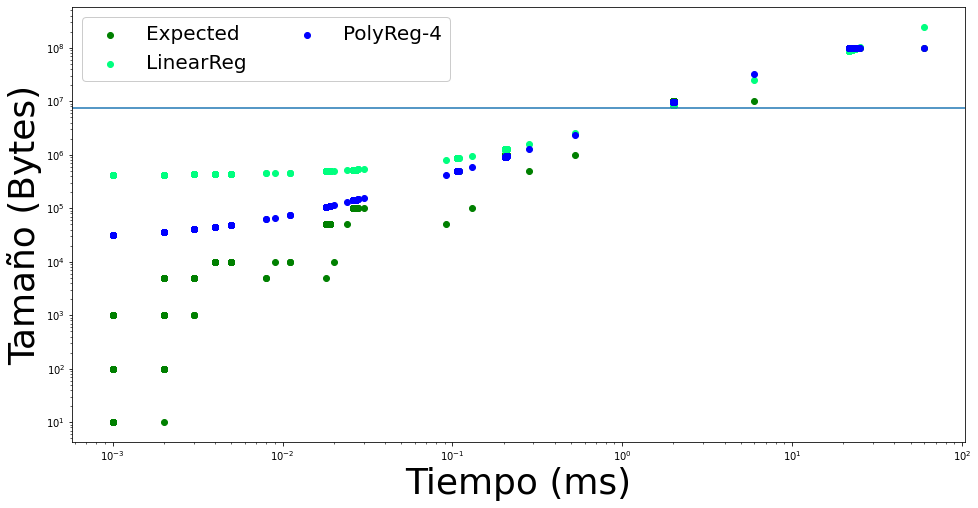

In [72]:
f=plt.figure(figsize=(16, 8))
ax=f.add_subplot(111)


for i in range(len(y_array)):
    ax.scatter(x2,y_array[i], color=colors_spawn[i])
#ax.plot(x2,y, color=colors_spawn[0])
ax.set_ylabel("Tamaño (Bytes)", fontsize=36)
ax.set_xlabel("Tiempo (ms)", fontsize=36)
ax.axhline(7549560)
plt.legend(labels=aux_labels, loc='best', fontsize=20,ncol=2,framealpha=1)
plt.xscale("log")
plt.yscale("log")
f.savefig("Images/Regresion.png", format="png")